<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#CH3" data-toc-modified-id="CH3-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>CH3</a></span><ul class="toc-item"><li><span><a href="#Sampling-from-a-grid-approximate-posterior" data-toc-modified-id="Sampling-from-a-grid-approximate-posterior-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Sampling from a grid-approximate posterior</a></span></li><li><span><a href="#Sampling-to-summarize" data-toc-modified-id="Sampling-to-summarize-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Sampling to summarize</a></span><ul class="toc-item"><li><span><a href="#(3.2.1)-Intervals-of-defined-boundaries.-" data-toc-modified-id="(3.2.1)-Intervals-of-defined-boundaries.--1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>(3.2.1) <font color="blue">Intervals of defined boundaries. </font></a></span></li><li><span><a href="#(3.2.2.)-Intervals-of-defined-mass." data-toc-modified-id="(3.2.2.)-Intervals-of-defined-mass.-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>(3.2.2.) <font color="blue">Intervals of defined mass.</font></a></span></li><li><span><a href="#(3.2.3.)-Point-estimates.-" data-toc-modified-id="(3.2.3.)-Point-estimates.--1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>(3.2.3.) <font color="blue">Point estimates. </font></a></span></li></ul></li><li><span><a href="#(3.3.)-Sampling-to-simulate-prediction" data-toc-modified-id="(3.3.)-Sampling-to-simulate-prediction-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>(3.3.) Sampling to simulate prediction</a></span><ul class="toc-item"><li><span><a href="#Dummy-data." data-toc-modified-id="Dummy-data.-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Dummy data.</a></span></li><li><span><a href="#Model-checking." data-toc-modified-id="Model-checking.-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Model checking.</a></span></li></ul></li><li><span><a href="#Practice-Problems" data-toc-modified-id="Practice-Problems-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span><font color="purple">Practice Problems</font></a></span><ul class="toc-item"><li><span><a href="#EASY" data-toc-modified-id="EASY-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>EASY</a></span></li><li><span><a href="#Medium." data-toc-modified-id="Medium.-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Medium.</a></span></li><li><span><a href="#Hard" data-toc-modified-id="Hard-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Hard</a></span></li></ul></li></ul></li><li><span><a href="#Week-1-Homework" data-toc-modified-id="Week-1-Homework-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Week 1 Homework</a></span></li></ul></div>

In [62]:
library(tidyverse)
library(rethinking)

# CH3

In [ ]:
Pr_Positive_RareEvent <- 0.95
Pr_Positive_Normal    <- 0.01
Pr_RareEvent          <- 0.001

Pr_Positive <- Pr_Positive_RareEvent * Pr_RareEvent +
               Pr_Positive_Normal    * ( 1 - Pr_RareEvent )

( Pr_RareEvent_Positive <- Pr_Positive_RareEvent*Pr_RareEvent / Pr_Positive )


In [63]:
Pr_Positive_Vampire <- 0.95
Pr_Positive_Mortal <- 0.01
Pr_Vampire <- 0.001

Pr_Positive <- Pr_Positive_Vampire * Pr_Vampire +
               Pr_Positive_Mortal  * ( 1 - Pr_Vampire )

( Pr_Vampire_Positive <- Pr_Positive_Vampire*Pr_Vampire / Pr_Positive )

[1] 0.08683729

In [2]:
Pr_Positive_RareEvent <- 0.95
Pr_Positive_Normal    <- 0.01
Pr_RareEvent          <- 0.001

Pr_Positive <- Pr_Positive_RareEvent * Pr_RareEvent +
               Pr_Positive_Normal  * ( 1 - Pr_RareEvent )

( Pr_RareEvent_Positive <- Pr_Positive_RareEvent*Pr_RareEvent / Pr_Positive )

[1] 0.08683729

In [2]:
Pr_Positive_RareEvent <- 0.998
Pr_Positive_Normal    <- 0.01
Pr_RareEvent          <- 0.02

Pr_Positive <- Pr_Positive_RareEvent * Pr_RareEvent +
               Pr_Positive_Normal  * ( 1 - Pr_RareEvent )

( Pr_RareEvent_Positive <- Pr_Positive_RareEvent*Pr_RareEvent / Pr_Positive )

[1] 0.08683729

In [64]:
Pr_Positive = (.95*0.001)+(.01*(1-0.001))
Pr_Positive 

[1] 0.01094

## Sampling from a grid-approximate posterior

<font color = 'purple'>how to compute the posterior for the globe tossing model, using grid approximation:</font>

In [90]:
p_grid <- seq( from=0 , to=1 , length.out=1000 )
prior <- rep( 1 , 1000 )
likelihood <- dbinom( 6 , size=9 , prob=p_grid )
posterior_counts <- likelihood * prior
posterior_prob_distribution <- posterior_counts / sum(posterior_counts)
posterior <- posterior_prob_distribution
sum(posterior)

[1] 1

In [75]:
sum(likelihood)
sum(prior)

[1] 99.9

[1] 1000

In [82]:
# p_grid <- seq( from=0 , to=1 , length.out=1000 )
# prior <- rep( 1 , 1000 )
# likelihood <- dbinom( 6 , size=9 , prob=p_grid )
# unstandardized_posterior <- likelihood * prior
# sum(unstandardized_)

In [66]:
plot_distribution <- function(x,y){
    plot(x=x,y=y,type='b',
        xlab="Probability of Water",
        ylab="Posterior Probability")
    title <- paste(length(x),"Points") 
    # paste <- Concatenate vectors after converting to character.
    mtext(title)
}

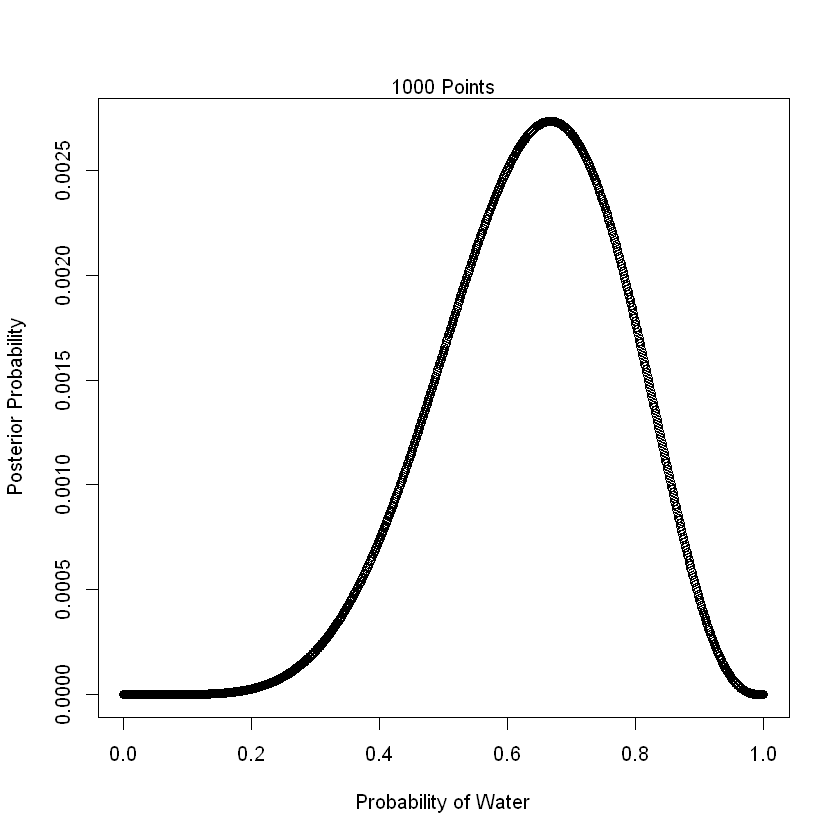

In [67]:
plot_distribution(p_grid, posterior)

Now we wish to <font color = 'blue'>draw 10,000 samples from this posterior</font>. Imagine the posterior is a bucket full of parameter values, numbers such as 0.1, 0.7, 0.5, 1, etc. Within the bucket, each value exists in proportion to its posterior probability, such that values near the peak are much more common than those in the tails. We’re going to scoop out 10,000 values from the bucket. Provided the bucket is well mixed, the resulting samples will have the same proportions as the exact posterior density. Therefore the individual values of p will appear in our samples in proportion to the posterior plausibility of each value. Here’s how you can do this in R, with one line of code:

In [68]:
samples <- sample( p_grid , prob=posterior , size=1e4 , replace=TRUE )
# p_grid is the set of possible values
# prob=posterior is the probability of pulling each possible
# parameter value from p_grid

The workhorse here is sample, which <font color = 'blue'>randomly pulls values from a vector</font>. The vector in this case is p_grid, the grid of parameter values. The probability of each value is given by posterior, which you computed just above.

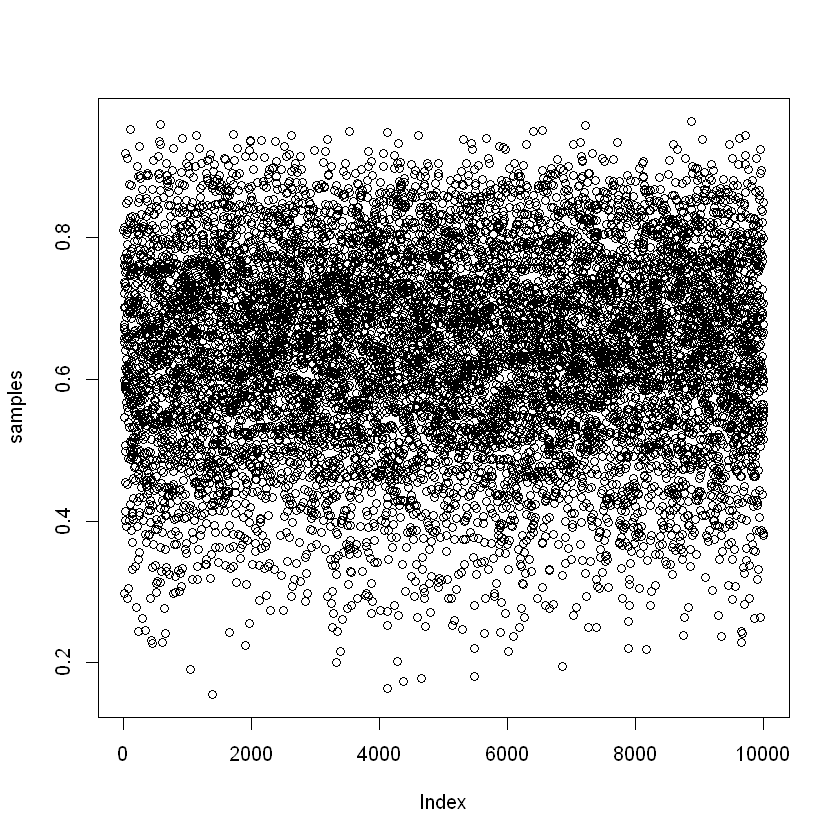

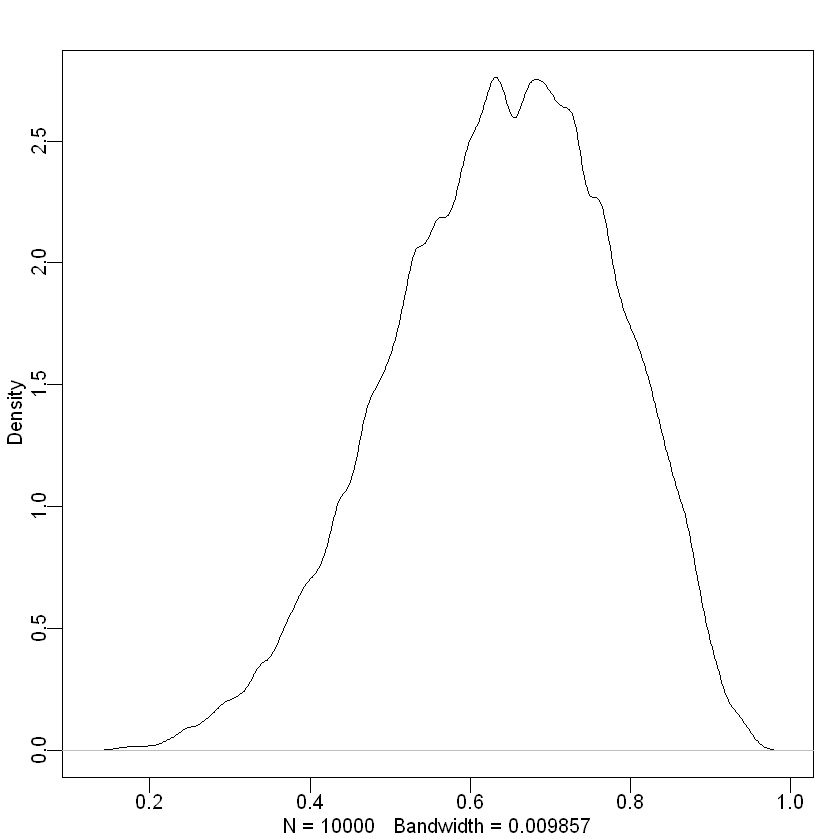

In [31]:
plot(samples); dens(samples)

## Sampling to summarize

### (3.2.1) <font color = 'blue'>Intervals of defined boundaries. </font>

<b><font color = 'purple'>Suppose I ask you for the posterior probability that the proportion of water is less than 0.5 </font></b>. 

Using the grid-approximate posterior, you can just <font color = 'blue'>add up all of the probabilities, where the corresponding parameter value is less than 0.5</font>:

In [78]:
# add up posterior probability where p < 0.5 
sum( posterior[ p_grid < 0.5 ] )

[1] 0.1718746

So about 17% of the posterior probability is below 0.5. Couldn’t be easier. But since grid ap- proximation isn’t practical in general, it won’t always be so easy. Once there is more than one parameter in the posterior distribution (wait until the next chapter for that complication), even this simple sum is no longer very simple. 

<b><font color = 'purple'>So let’s see how to perform the same calculation, using samples from the posterior </font></b>. 

This approach does generalize to complex models with many parameters, and so you can use it everywhere. <font color = 'blue'>All you have to do is similarly add up all of the samples below 0.5, but also divide the resulting count by the total number of samples. In other words, find the frequency of parameter values below 0.5</font>:

In [79]:
sum( samples < 0.5 ) / 1e4

[1] 0.1716

And that’s nearly the same answer as the grid approximation provided, although your answer will not be exactly the same, because the exact samples you drew from the posterior will be different. This region is shown in the upper-left plot in Figure 3.2. 

<font color = 'purple'>Using the same approach, you can ask how much posterior probability lies between 0.5 and 0.75: </font>

In [80]:
sum( samples > 0.5 & samples < 0.75 ) / 1e4

[1] 0.6079

So about 61% of the posterior probability lies between 0.5 and 0.75. This region is shown in the upper-right plot of Figure 3.2.

In [41]:
(samples < 0.5) %>% head(10)
sum((samples < 0.5) %>% head(10))

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE

[1] 1

### (3.2.2.) <font color = 'blue'>Intervals of defined mass.</font>

It is more common to see scientific journals reporting an interval of defined mass, usually known as a <span style='background-color: lightgreen'>confidence interval</span>. An interval of posterior probability, such as the ones we are working with, may instead be called a <span style='background-color: lightgreen'>credible interval</span>, although the terms may also be used interchangeably, in the usual polysemy that arises when commonplace words are used in technical definitions. It’s easy to keep track of what’s being summarized, however, as long as you pay attention to how the model is defined. 
 
 These posterior intervals report two parameter values that contain between them a specified amount of posterior probability, a probability mass. For this type of interval, it is easier to find the answer by using samples from the posterior than by using a grid approximation.<font color = 'purple'> Suppose for example you want to know the boundaries of the lower 80% posterior probability. You know this interval starts at p = 0. To find out where it stops, think of the samples as data and ask where the 80th percentile lies</font>:

<img src='pics/SR_13.png' alt='Drawing' style='width: 350pt'/>

In [81]:
quantile( samples , 0.8 ) 

80% 
0.7587588

This region is shown in the bottom-left plot in Figure 3.2. Similarly, the middle 80% interval lies between the 10th percentile and the 90th percentile. These boundaries are found using the same approach:

In [82]:
 quantile( samples , c( 0.1 , 0.9 ) )

10%       90% 
0.4474474 0.8108108

This region is shown in the bottom-right plot in Figure 3.2. Intervals of this sort, which assign equal probability mass to each tail, are very common in the scientific literature. We’ll call them percentile intervals (PI). These intervals do a good job of communicating the shape of a distribution, as long as the distribution isn’t too asymmetrical. But in terms of supporting inferences about which parameters are consistent with the data, they are not perfect. Consider the posterior distribution and different intervals in Figure 3.3. This posterior is consistent with observing three waters in three tosses and a uniform (flat) prior. It is highly skewed, having its maximum value at the boundary, p = 1. You can compute it, via grid approximation, with:

In [83]:
p_grid <- seq( from=0 , to=1 , length.out=1000 )
prior <- rep(1,1000)
likelihood <- dbinom( 3 , size=3 , prob=p_grid )
posterior <- likelihood * prior
posterior <- posterior / sum(posterior)
samples <- sample( p_grid , size=1e4 , replace=TRUE , prob=posterior )

This code also goes ahead to sample from the posterior. Now, on the left of Figure 3.3, the 50% percentile confidence interval is shaded. You can conveniently compute this from the samples with PI (part of rethinking):

In [84]:
PI( samples , prob=0.5 )

25%       75% 
0.7057057 0.9319319

This interval assigns 25% of the probability mass above and below the interval. So it provides the central 50% probability. But in this example, it ends up excluding the most probable parameter values, near p = 1. So in terms of describing the shape of the posterior distribution—which is really all these intervals are asked to do—the percentile interval can be misleading. 

<img src='pics/SR_14.png' alt='Drawing' style='width: 350pt'/>

In contrast, the right-hand plot in Figure 3.3 displays the 50% <span style='background-color: lightgreen'>highest posterior density interval (HPDI)</span>.51 

* The HPDI is the narrowest interval containing the specified probability mass. If you think about it, there must be an infinite number of posterior intervals with the same mass. But if you want an interval that best represents the parameter values most consistent with the data, then you want the densest of these intervals. That’s what the HPDI is. Compute it from the samples with HPDI (also part of rethinking):

In [85]:
HPDI( samples , prob=0.5 )

|0.5      0.5| 
0.8368368 0.9979980

This interval captures the parameters with highest posterior probability, as well as being noticeably narrower: 0.16 in width rather than 0.23 for the percentile interval.

<font color = 'blue'>So the HPDI has some advantages over the PI. But in most cases, these two types of interval are very similar</font>. 

* They only look so different in this case because the posterior distribution is highly skewed. If we instead used samples from the posterior distribution for six waters in nine tosses, these intervals would be nearly identical. 

<font color = 'lightgrey'>Try it for yourself, using different probability masses, such as prob=0.8 and prob=0.95. When the posterior is bell shaped, it hardly matters which type of interval you use</font>.

**The HPDI also has some disadvantages**. HPDI is more computationally intensive than PI and suffers from greater simulation variance, which is a fancy way of saying that it is **sensitive to how many samples you draw from the posterior**. It is also harder to understand and many scientific audiences will not appreciate its features, while they will immediately understand a percentile interval, as ordinary non-Bayesian intervals are nearly always percentile intervals (although of sampling distributions, not posterior distributions).

Overall, if the choice of interval type makes a big difference, then you shouldn’t be us- ing intervals to summarize the posterior. Remember, the entire posterior distribution is the Bayesian estimate. It summarizes the relative plausibilities of each possible value of the parameter. Intervals of the distribution are just helpful for summarizing it. If choice of in- terval leads to different inferences, then you’d be better off just plotting the entire posterior distribution.

### (3.2.3.) <font color = 'blue'>Point estimates. </font>

The third and final common summary task for the posterior is to produce point estimates of some kind. Given the entire posterior distribution, what value should you report? This seems like an innocent question, but it is difficult to answer. **<font color = 'green'>The Bayesian parameter estimate is precisely the entire posterior distribution, which is not a single number, but instead a function that maps each unique parameter value onto a plausibility value</font>**. So really the most important thing to note is that you don’t have to choose a point estimate. It’s hardly ever necessary. 

But if you must produce a point estimate from the posterior, you’ll have to ask and answer more questions. <font color = 'purple'>Consider the following example. Suppose again the globe tossing experiment in which we observe 3 waters out of 3 tosses, as in Figure 3.3. Let’s consider three alternative point estimates.</font> 

First, it is very common for scientists to report the parameter value with highest posterior probability, a <span style='background-color: lightgreen'>maximum a posteriori (MAP) estimate</span>. You can easily compute the MAP in this example:

In [86]:
p_grid[which.max(posterior)] 

[1] 1

Or if you instead have samples from the posterior, you can still approximate the same point:

In [87]:
chainmode( samples , adj=0.01 ) 

[1] 0.9971391

But why is this point, the mode, interesting? Why not report the posterior mean or median?

In [88]:
mean( samples )
median( samples )

[1] 0.7998498

[1] 0.8393393

These are also point estimates, and they also summarize the posterior. But all three—the mode (MAP), mean, and median—are different in this case. How can we choose among them? Figure 3.4 shows this posterior distribution and the locations of these point summaries.

One principled way to go beyond using the entire posterior as the estimate is to choose a <span style='background-color: lightgreen'>loss function</span>. 

* A loss function is a rule that tells you the cost associated with using any particular point estimate. While statisticians and game theorists have long been interested in loss functions, and how Bayesian inference supports them, scientists hardly ever use them explicitly. The key insight is that different loss functions imply different point estimates.

<font color = 'purple'>Here’s an example to help us work through the procedure. Suppose I offer you a bet. Tell me which value of p, the proportion of water on the Earth, you think is correct. I will pay you $100, if you get it exactly right. But I will subtract money from your gain, proportional to the distance of your decision from the correct value. Precisely, your loss is proportional to the absolute value of d − p, where d is your decision and p is the correct answer. We could change the precise dollar values involved, without changing the important aspects of this problem. What matters is that the loss is proportional to the distance of your decision from the true value</font>. 

Now once you have the posterior distribution in hand, how should you use it to maximize your expected winnings? **<font color = 'blue'>It turns out that the parameter value that maximizes expected winnings (minimizes expected loss) is the median of the posterior distribution</font>**. Let’s calcu- late that fact, without using a mathematical proof. Those interested in the proof should follow the endnote.56

<img src='pics/SR_15.png' alt='Drawing' style='width: 350pt'/>

<font color = 'green'>Calculating expected loss for any given decision means using the posterior to average over our uncertainty in the true value</font>. Of course we don’t know the true value, in most cases. But if we are going to use our model’s information about the parameter, that means using the entire posterior distribution. So suppose we decide p = 0.5 will be our decision. Then the expected loss will be:

In [89]:
sum( posterior*abs( 0.5 - p_grid ) )
# we guess probability of water = 0.5

[1] 0.3128752

The symbols posterior and p_grid are the same ones we’ve been using throughout this chapter, containing the posterior probabilities and the parameter values, respectively. <font color = 'blue'>All the code above does is compute the weighted average loss, where each loss is weighted by its corresponding posterior probability</font>.<font color = 'green'> **There’s a trick for repeating this calculation for every possible decision, using the function sapply**.</font>

In [92]:
loss <- sapply( p_grid , function(d) sum( posterior*abs( d - p_grid ) ) )
loss %>% fivenum() %>% round(2)

[1] 0.13 0.16 0.31 0.55 0.80

<font color = 'blue'>**Now the symbol loss contains a list of loss values, one for each possible decision, corresponding the values in p_grid**</font>. From here, it’s easy to find the parameter value that mini- mizes the loss:

In [91]:
p_grid[ which.min(loss) ]

[1] 0.8408408

<font color = 'red'>And this is actually the posterior median</font>, the parameter value that splits the posterior density such that half of the mass is above it and half below it. Try median(samples) for comparison. It may not be exactly the same value, due to sampling variation, but it will be close.

## (3.3.) Sampling to simulate prediction

<img src='pics/SR_16.png' alt='Drawing' style='width: 450pt'/>

### Dummy data.

<font color = 'purple'>Let’s summarize the globe tossing model that you’ve been working with for two chapters now. A fixed true proportion of water p exists, and that is the target of our inference. Tossing the globe in the air and catching it produces observations of “water” and “land” that appear in proportion to p and 1 − p, respectively</font>. 

* Now note that these assumptions not only allow us to infer the plausibility of each possible value of p, after observation. That’s what you did in the previous chapter. **<font color = 'blue'>These assumptions also allow us to simulate the observations that the model implies</font>**. 


* <font color = 'red'>They allow this, because likelihood functions work in both directions</font>. Given a realized observation, the likelihood function says how plausible the observation is. 


* And given only the parameters, the likelihood defines a distribution of possible observations that we can sample from, to simulate observation. **<font color = 'blue'>In this way, Bayesian models are always generative, capable of simulating predictions</font>**. Many non-Bayesian models are also generative, but many are not.

We will call such simulated data dummy data, to indicate that it is a stand-in for actual data. With the globe tossing model, the dummy data arises from a binomial likelihood:

$Pr(w|n,p)=\frac{n!}{w!(n-w)!}p^w(1-p)^{n-w}$

* where w is an observed count of “water” and 
* n is the number of tosses. 

Suppose n = 2, two tosses of the globe. Then there are only three possible observations: 0 water, 1 water, 2 water. You can quickly compute the likelihood of each, for any given value of p. Let’s use p = 0.7, which is just about the true proportion of water on the Earth:

In [1]:
dbinom( 0:2 , size=2 , prob=0.7 )

[1] 0.09 0.42 0.49

In [6]:
dbinom( 3 , size=3 , prob=0.7 )

[1] 0.343

<font color = 'blue'>This means that there’s a 9% chance of observing w = 0, a 42% chance of w = 1, and a 49% chance of w = 2. 
    
If you change the value of p, you’ll get a different distribution of implied observations.</font>

<font color = 'purple'>Now we’re going to simulate observations, using these likelihoods</font>. This is done by sampling from the distribution just described above. You could use sample to do this, but R provides convenient sampling functions for all the ordinary probability distributions, like the binomial. So a single dummy data observation of w can be sampled with:

In [94]:
rbinom( 1 , size=2 , prob=0.7 )

[1] 1

<font color = 'green'>The “r” in rbinom stands for “random.” It can also generate more than one simulation at a time. A set of 10 simulations can be made by:</font>

In [97]:
rbinom( 10 , size=2 , prob=0.7 )

[1] 1 2 2 1 2 2 1 2 2 2

<img src='pics/SR_17.png' alt='Drawing' style='width: 450pt'/>

Let’s generate 100,000 dummy observations, just to verify that each value (0, 1, or 2) appears in proportion to its likelihood:

In [117]:
dummy_w <- rbinom( 1e5 , size=2 , prob=0.7 )
(table(dummy_w)/1e5) %>% round(2)

dummy_w
   0    1    2 
0.09 0.42 0.49 

Only two tosses of the globe isn’t much of a sample, though. So now let’s simulate the same sample size as before, 9 tosses.

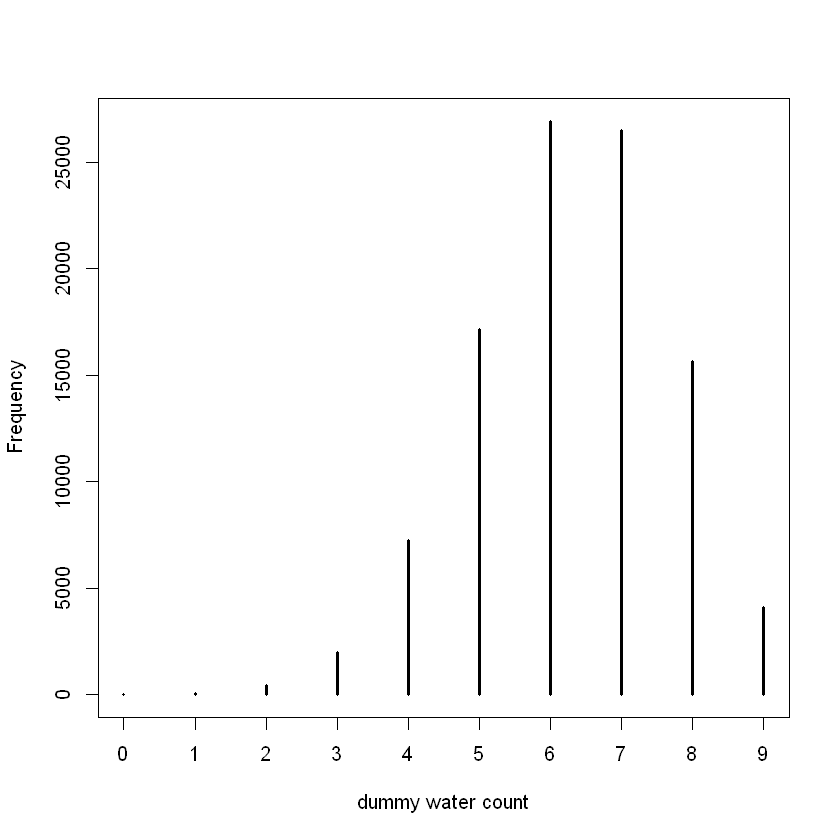

In [60]:
dummy_w <- rbinom( 1e5 , size=9 , prob=0.7 ) 
simplehist( dummy_w , xlab="dummy water count" )

The resulting plot is shown in Figure 3.5. Notice that most of the time the expected observation does not contain water in its true proportion, 0.7. 

That’s the nature of observation: <font color = 'blue'>There is a one-to-many relationship between data and data-generating processes</font>. 

You should experiment with sample size, the size input in the code above, as well as the prob, to see how the distribution of simulated samples changes shape and location.

### Model checking.

Model checking means (1) ensuring the model fitting worked correctly and (2) evaluating the adequacy of a model for some purpose. Since Bayesian mod- els are always generative, able to simulate observations as well as estimate parameters from observations, once you condition a model on data, you can simulate to examine the model’s empirical expectations.

We’d like to propagate the parameter uncertainty—carry it forward—as we evaluate the implied predictions. All that is required is averaging over the posterior density for p, while computing the predictions. For each possible value of the parameter p, there is an implied distribution of outcomes. So if you were to compute the sampling distribution of outcomes at each value of p, then you could average all of these prediction distributions together, using the posterior probabilities of each value of p, to get a posterior predictive distribution. 

Figure 3.6 illustrates this averaging. At the top, the posterior distribution is shown, with 10 unique parameter values highlighted by the vertical lines. The implied distribution of observations specific to each of these parameter values is shown in the middle row of plots. Observations are never certain for any value of p, but they do shift around in response to it. Finally, at the bottom, the sampling distributions for all values of p are combined, using the posterior probabilities to compute the weighted average frequency of each possible observation, zero to nine water samples.

<img src='pics/SR_18.png' alt='Drawing' style='width: 450pt'/>

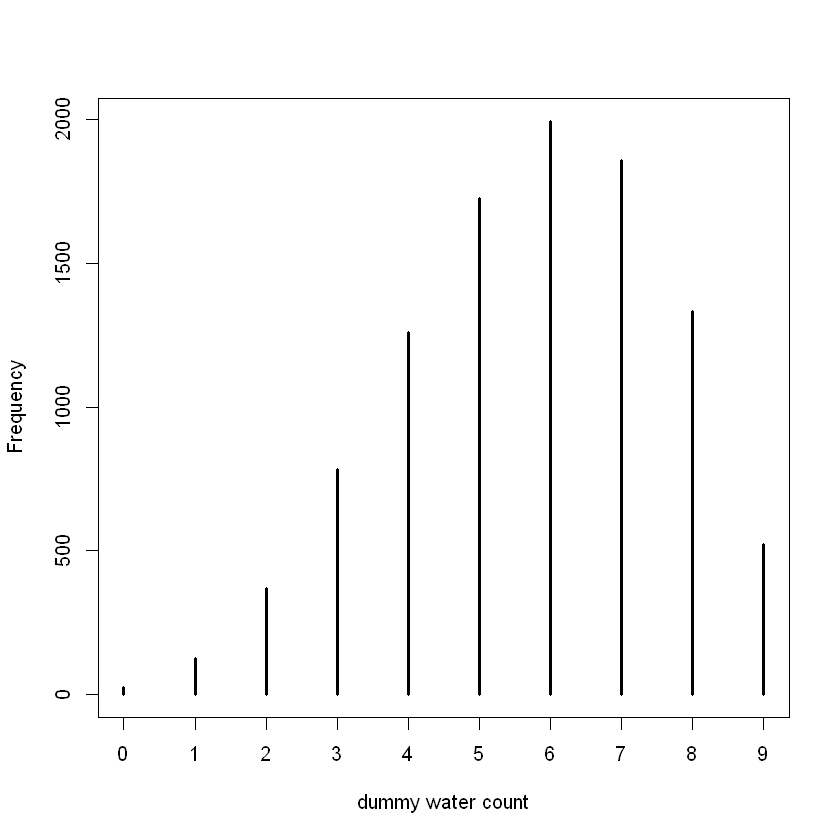

In [84]:
w <- rbinom( 1e4 , size=9 , prob=samples )
simplehist( w , xlab="dummy water count" )

In [86]:
# HOW SAMPLES WAS CREATED

# p_grid <- seq( from=0 , to=1 , length.out=1000 )
# prior <- rep( 1 , 1000 )
# likelihood <- dbinom( 6 , size=9 , prob=p_grid )
# posterior_counts <- likelihood * prior
# posterior_prob_distribution <- posterior_freq / sum(posterior_counts)

# samples <- sample( p_grid , prob=posterior_prob_distribution , size=1e4 , replace=TRUE )

The symbol samples above is the same list of random samples from the posterior distribution that you’ve used in previous sections. 

* For each sampled value, a random binomial observation is generated. Since the sampled values appear in proportion to their posterior probabilities, the resulting simulated observations are averaged over the posterior. 

You can manipulate these simulated observations just like you manipulate samples from the posterior—you can compute intervals and point statistics using the same procedures. 

If you plot these samples, you’ll see the distribution shown in the right-hand plot in Figure 3.6.

## <font color = 'purple'>Practice Problems</font>

### EASY

These problems use the samples from the posterior distribution for the globe tossing example. This code will give you a specific set of samples, so that you can check your answers exactly.

In [20]:
p_grid <- seq( from=0 , to=1 , length.out=1000 ) 
prior <- rep( 1 , 1000 )
likelihood <- dbinom( 6 , size=9 , prob=p_grid )
posterior <- likelihood * prior
posterior <- posterior / sum(posterior)
set.seed(100)
samples <- sample( p_grid , prob=posterior , size=1e4 , replace=TRUE )

**<font color = 'purple' style='background-color: lightyellow'>3E1. How much posterior probability lies below p = 0.2?</font>**

So let’s see how to perform the same calculation, using samples from the posterior. This approach does generalize to complex models with many parameters, and so you can use it everywhere. <span style='background-color: lightgreen'>All you have to do is similarly add up all of the samples below 0.5, but also divide the resulting count by the total number of samples</span>. In other words, find the frequency of parameter values below 0.5:

In [26]:
sum(posterior[p_grid < 0.2])
sum(samples < 0.2) / 1e4
mean(samples<0.2) 

[1] 0.0008560951

[1] 5e-04

[1] 5e-04

So values below 0.2 (the globe being covered by <20% water) are quiiiiiiiiite unlikely.

**<font color = 'purple' style='background-color: lightyellow'>3E2. How much posterior probability lies above p = 0.8?</font>**

In [28]:
sum(posterior[p_grid > 0.8])
sum(samples > 0.8) / 1e4
mean(samples>0.8) 

[1] 0.1203449

[1] 0.1117

[1] 0.1117

**<font color = 'purple' style='background-color: lightyellow'>3E3. How much posterior probability lies between p = 0.2 and p = 0.8?</font>**

In [31]:
sum(posterior[p_grid > 0.2 & p_grid < 0.8])
sum(samples > 0.2 & samples < 0.8) / 1e4
mean(samples > 0.2 & samples < 0.8)

[1] 0.878799

[1] 0.8878

[1] 0.8878

**<font color = 'purple' style='background-color: lightyellow'>3E4. 20% of the posterior probability lies below which value of p?</font>**

In [32]:
# sum(posterior[p_grid > 0.2 & p_grid < 0.8])
quantile( samples , 0.2 )

20% 
0.5195195

**<font color = 'purple' style='background-color: lightyellow'>3E5. 20% of the posterior probability lies above which value of p?</font>**

In [33]:
quantile(samples, c(0.2, 0.8))

20%       80% 
0.5195195 0.7567568

**<font color = 'purple' style='background-color: lightyellow'>3E6. Which values of p contain the narrowest interval equal to 66% of the posterior probability?</font>**

In [34]:
HPDI( samples , prob=0.66 )

|0.66     0.66| 
0.5205205 0.7847848

**<font color = 'purple' style='background-color: lightyellow'>3E7. Which values of p contain 66% of the posterior probability, assuming equal posterior probability both below and above the interval?</font>**

In [36]:
PI(samples, prob=0.66)

17%       83% 
0.5005005 0.7687688

### Medium.

**<font color = 'purple' style='background-color: lightyellow'>3M1. Suppose the globe tossing data had turned out to be 8 water in 15 tosses. Construct the posterior distribution, using grid approximation. Use the same flat prior as before.</font>**

[1] 0.5335335

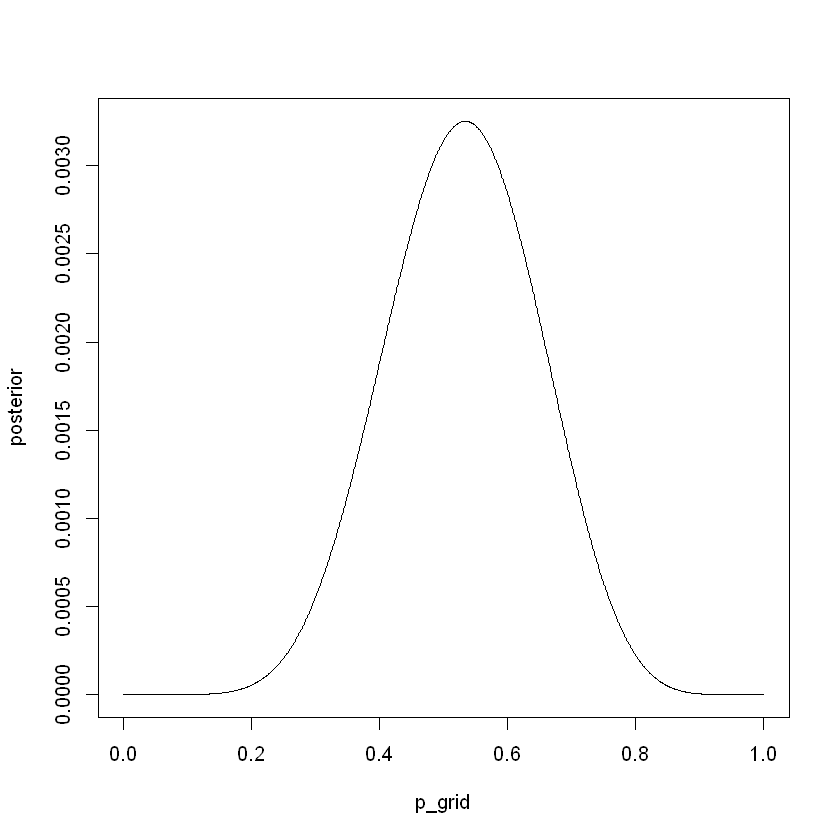

In [38]:
p_grid <- seq( from=0 , to=1 , length.out=1000 ) 
prior <- rep( 1 , 1000 )
likelihood <- dbinom( 8 , size=15 , prob=p_grid )
unstd.posterior <- likelihood * prior
posterior <- unstd.posterior / sum(unstd.posterior)
plot(p_grid, posterior, type='l')
p_grid[ which.max(posterior) ] #0.5335335

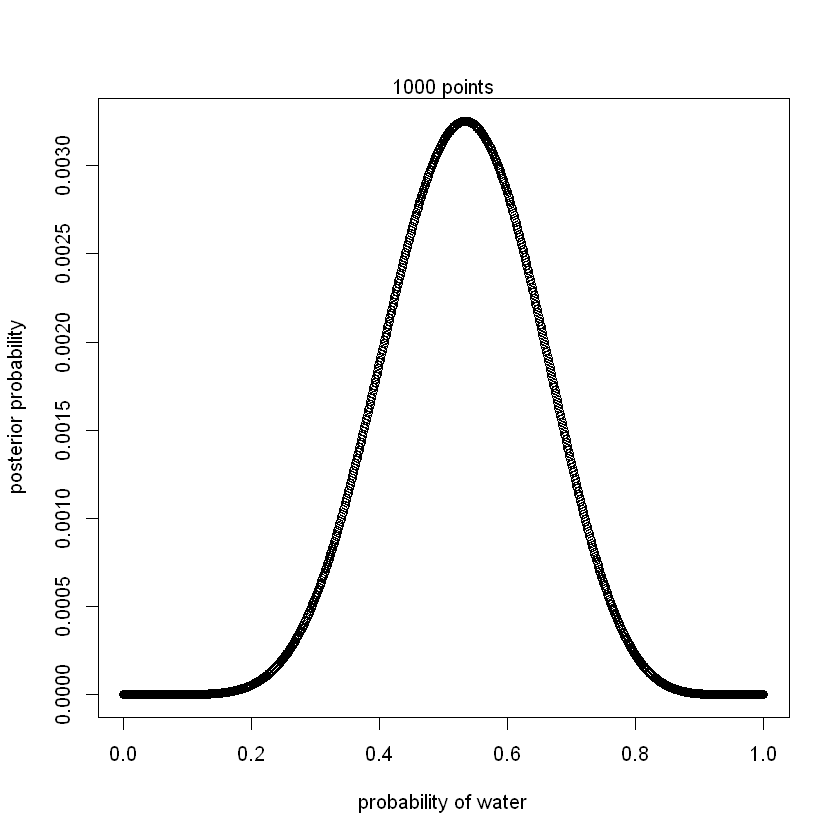

In [39]:
p_grid <- seq(from=0, to=1 , length.out=1000) 
prior <- rep(1, 1000)
likelihood <- dbinom(8, size=15, prob=p_grid)   #the only difference to the original code
posterior <- likelihood * prior
posterior <- posterior / sum(posterior)
plot(p_grid, posterior, type="b",
     xlab="probability of water", ylab="posterior probability")
mtext("1000 points")

**<font color = 'purple' style='background-color: lightyellow'>3M2. Draw 10,000 samples from the grid approximation from above. Then use the samples to calculate the 90% HPDI for p.</font>**

In [41]:
samples <- sample(p_grid, prob=posterior, size=1e4, replace=TRUE)
HPDI(samples, prob=0.9)

|0.9      0.9| 
0.3383383 0.7317317

In [42]:
trials <- 1e4
samples <- sample(x = p_grid, size = trials, prob = posterior, replace = TRUE)
HPDI(samples = samples, prob = .9)

|0.9      0.9| 
0.3343343 0.7197197

**<font color = 'purple' style='background-color: lightyellow'>3M3. Construct a posterior predictive check for this model and data. This means simulate the distribution of samples, averaging over the posterior uncertainty in p. What is the probability of observing 8 water in 15 tosses?</font>**

In [43]:
posterior.predictive.distribution <- rbinom(n = trials, size = n, prob = samples)
mean(posterior.predictive.distribution == 8)

[1] 0.1457

[1] 0.1426

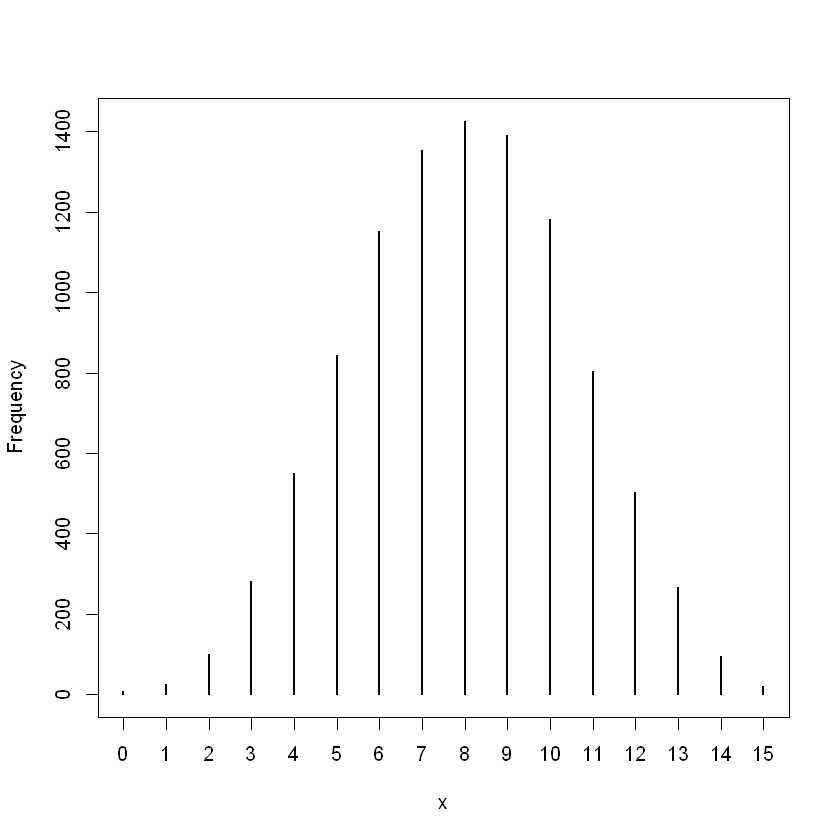

In [44]:
n = 15
dumdata <- rbinom(10000, size=n, prob=samples)
simplehist(dumdata)
mean(dumdata==8)

ppc
     0      1      2      3      4      5      6      7      8      9     10 
0.0005 0.0037 0.0106 0.0310 0.0530 0.0840 0.1117 0.1324 0.1482 0.1371 0.1192 
    11     12     13     14     15 
0.0838 0.0502 0.0249 0.0082 0.0015 

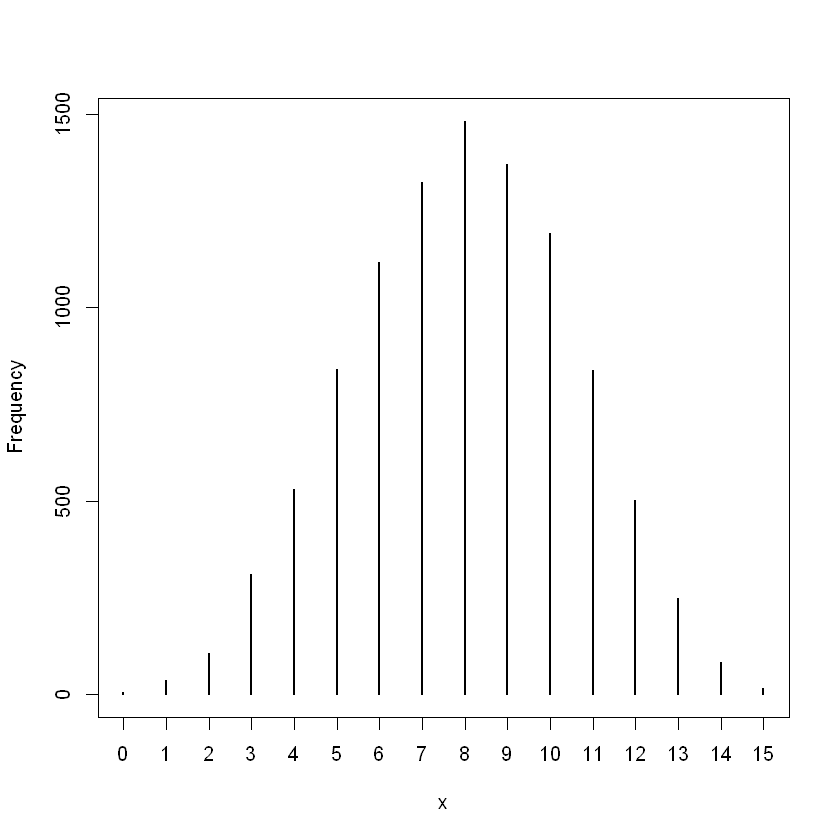

In [46]:
# For each sampled value, a random binomial observation is generated. Since the sampled values appear in proportion to their posterior probabilities, the resulting simulated observations are averaged over the posterior. 

ppc <- rbinom(1e4, size=15, prob=samples)
simplehist(ppc)
# The probability of observing 8 water in 15 tosses can be summarised as the point estimate. The highest posterior probability, a maximum a posteriori (MAP) estimate.

table(ppc)/1e4

**<font color = 'purple' style='background-color: lightyellow'>3M4. Using the posterior distribution constructed from the new (8/15) data, now calculate the probability of observing 6 water in 9 tosses.</font>**

In [47]:
posterior.predictive.distribution <- rbinom(n = trials, size = 9, prob = samples)
mean(posterior.predictive.distribution == 6)

[1] 0.1768

In [49]:
likelihood_6of9 <- dbinom( 6 , size=9 , prob=p_grid )
prior_6of9 <- posterior
(p_6of9 <- sum(likelihood_6of9*prior_6of9)) #0.1763898

[1] 0.1763898

In [48]:
ppc2 <- rbinom(1e4, size=9, prob=samples)
table(ppc2)/1e4

ppc2
     0      1      2      3      4      5      6      7      8      9 
0.0050 0.0265 0.0748 0.1405 0.1997 0.2041 0.1682 0.1151 0.0525 0.0136 

**<font color = 'purple' style='background-color: lightyellow'>3M5. Start over at 3M1, but now use a prior that is zero below p = 0.5 and a constant above p = 0.5. This corresponds to prior information that a majority of the Earth’s surface is water. Repeat each problem above and compare the inferences. What difference does the better prior make? If it helps, compare inferences (using both priors) to the true value p = 0.7.</font>**

<hr>CAVAUNPEU

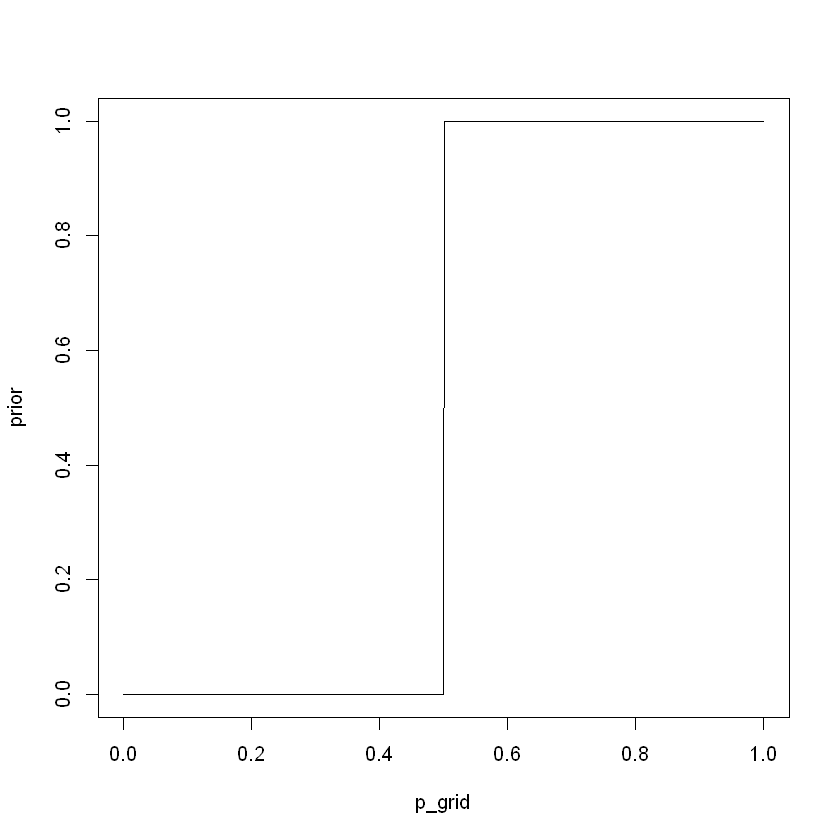

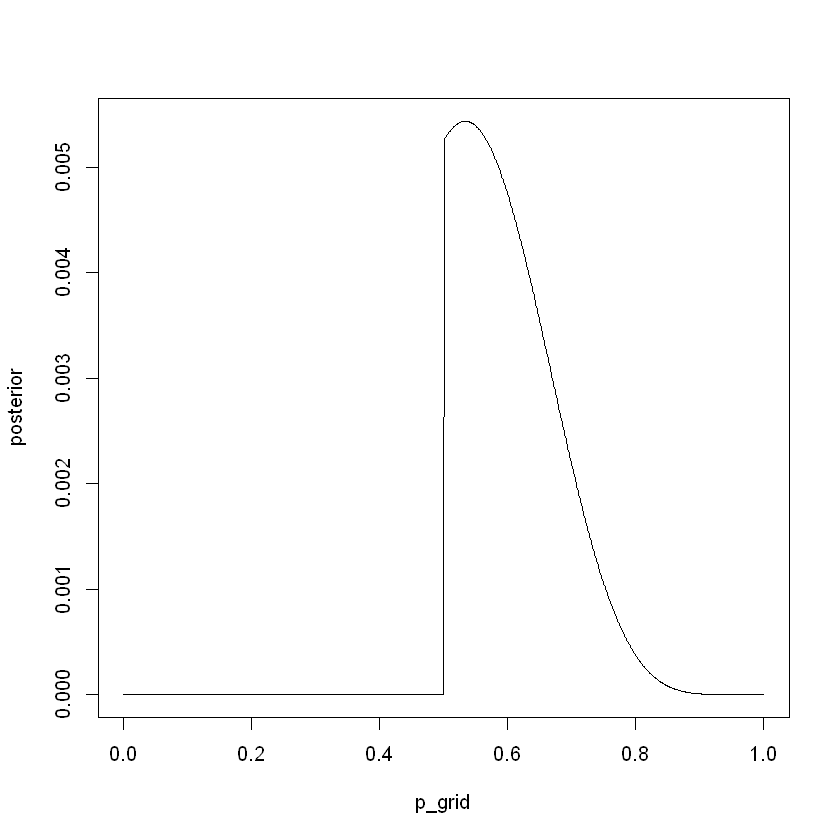

In [54]:
## 3M5 

# 3M1
w <- 8
n <- 15

p_grid <- seq(from = 0, to = 1, length.out = 1000)
prior <- ifelse(test = p_grid < .5, yes = 0, no = 1)
likelihood <- dbinom(x = w, size = n, prob = p_grid)
unstandardized.posterior <- likelihood * prior
posterior <- unstandardized.posterior / sum(unstandardized.posterior)

plot(prior ~ p_grid, type = "l")
plot(posterior ~ p_grid, type = "l")


In [55]:
# 3M2
trials <- 1e4
samples <- sample(x = p_grid, size = trials, prob = posterior, replace = TRUE)
HPDI(samples = samples, prob = .9)

|0.9      0.9| 
0.5005005 0.7117117

[1] 0.1565

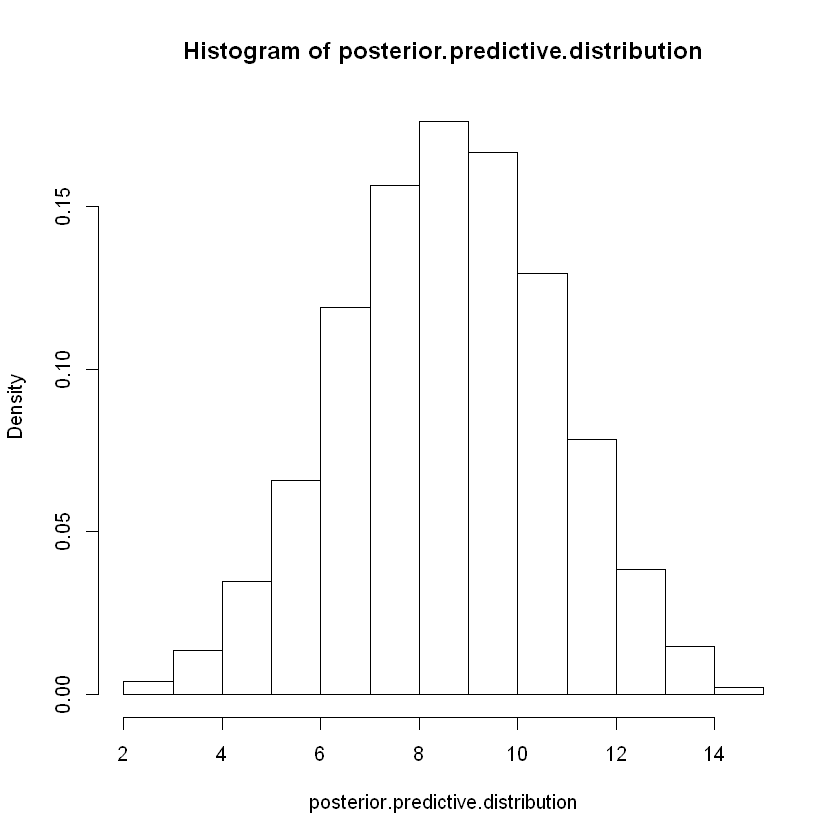

In [78]:
# 3M3
posterior.predictive.distribution <- rbinom(n = trials, size = n, prob = samples)
mean(posterior.predictive.distribution == 8)
# hist(posterior.predictive.distribution)
hist(posterior.predictive.distribution, freq=F)
# plot(density(posterior.predictive.distribution))
# plot(posterior.predictive.distribution ~ p_grid, type = "l")
# plot(posterior.predictive.distribution, type='l')

In [57]:
# 3M4
posterior.predictive.distribution <- rbinom(n = trials, size = 9, prob = samples)
mean(posterior.predictive.distribution == 6)

[1] 0.2335

<hr>JFFIST

[1] 0.5335335

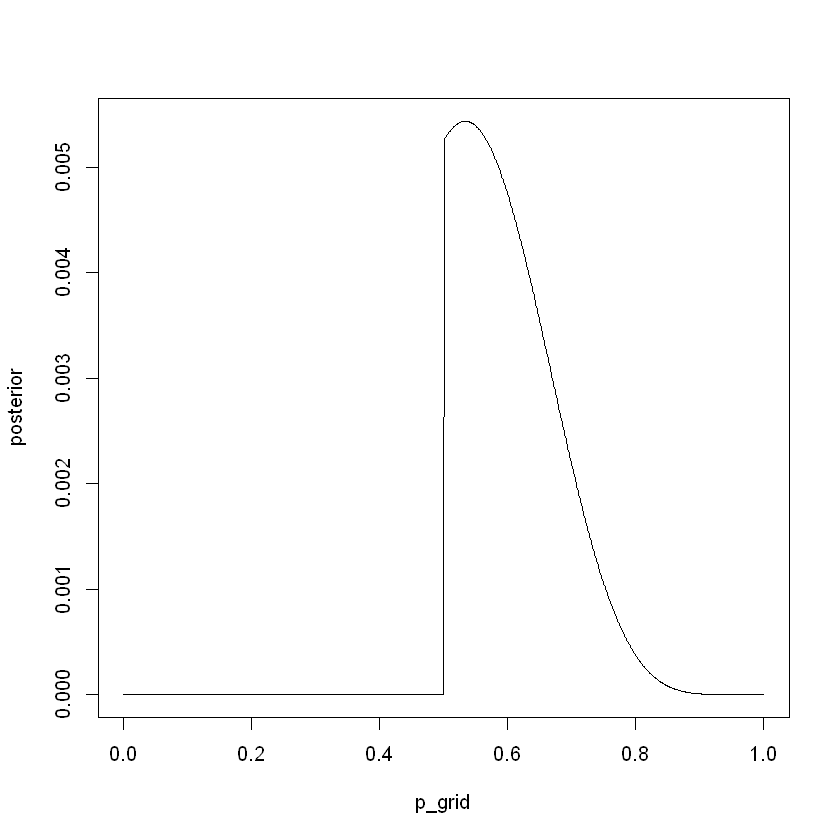

In [71]:
#### 5.1
p_grid <- seq( from=0 , to=1 , length.out=1000 ) 
prior <- ifelse(p_grid<0.5, 0, 0.5)
likelihood <- dbinom( 8 , size=15 , prob=p_grid )
posterior <- likelihood * prior
posterior <- posterior / sum(posterior)
plot(p_grid, posterior, type='l')
p_grid[ which.max(posterior) ] # 0.5335335

|0.9      0.9| 
0.5005005 0.7137137

[1] 0.6070759

[1] 0.5945946

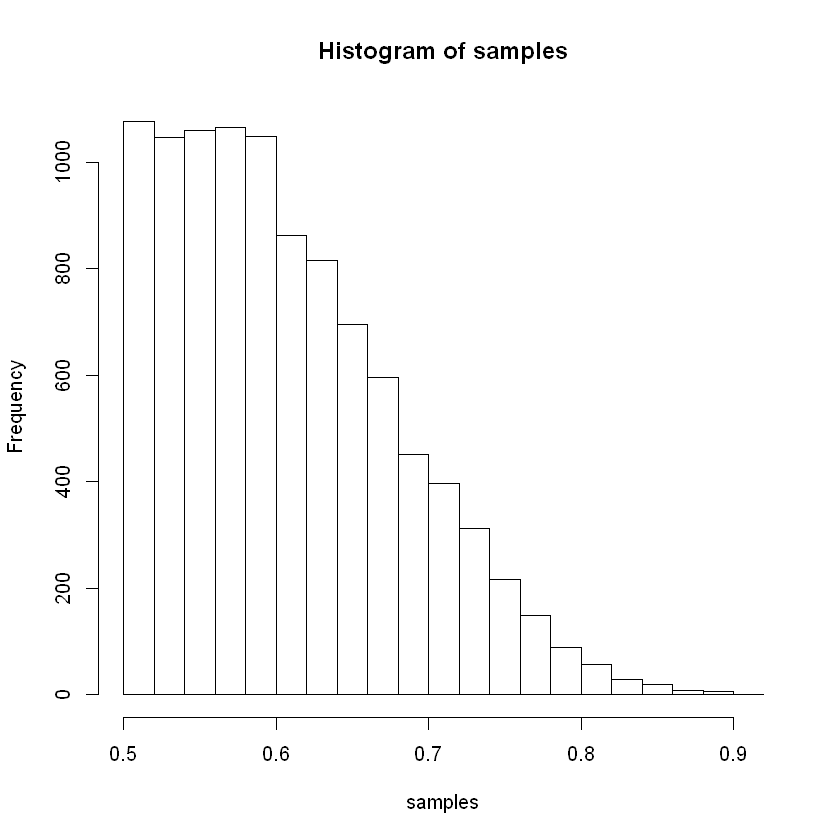

In [79]:
#### 5.2
set.seed(123)
samples <- sample(p_grid, prob = posterior, replace = TRUE, size = 1e+4)
hist(samples)
HPDI(samples, prob = .9) #0.5005005 0.7137137
mean(samples) #0.6070759
median(samples) #0.5945946

[1] 0.1576

dumdata
     1      2      3      4      5      6      7      8      9     10     11 
0.0001 0.0007 0.0032 0.0111 0.0335 0.0647 0.1139 0.1576 0.1744 0.1724 0.1317 
    12     13     14     15 
0.0781 0.0422 0.0133 0.0031 

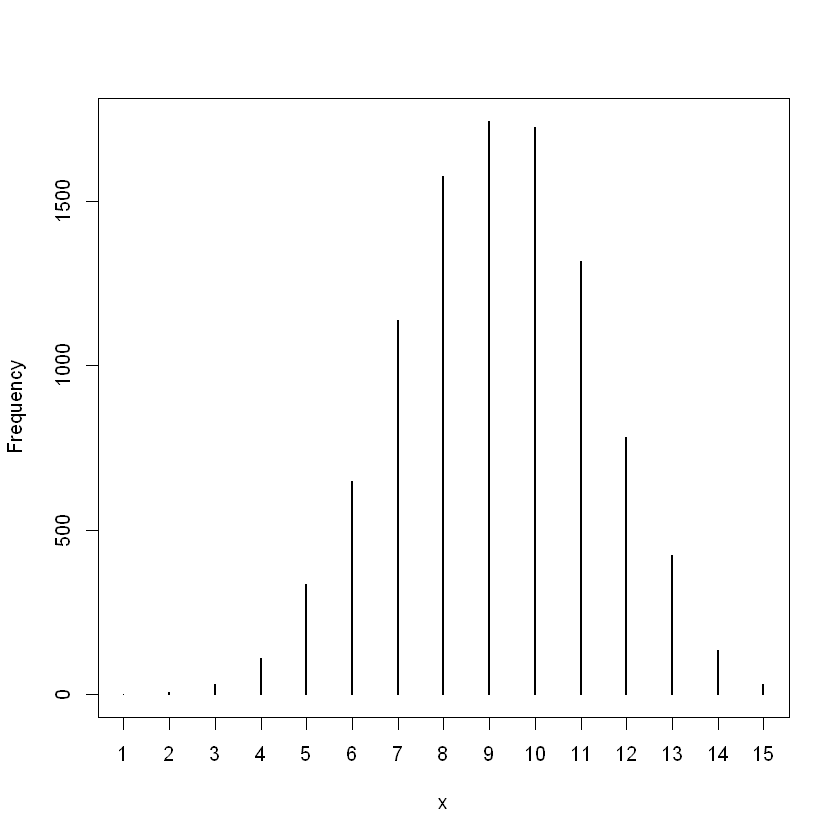

In [80]:
#### 5.3
n = 15
dumdata <- rbinom(10000, size=n, prob=samples)
simplehist(dumdata)
mean(dumdata==8) #0.1576
table(dumdata)/1e+4

In [81]:
#### 5.4
likelihood_6of9 <- dbinom( 6 , size=9 , prob=p_grid )
prior_6of9 <- posterior
(p_6of9 <- sum(likelihood_6of9*prior_6of9)) #0.2323071

[1] 0.2323071

[1] 0.5335335

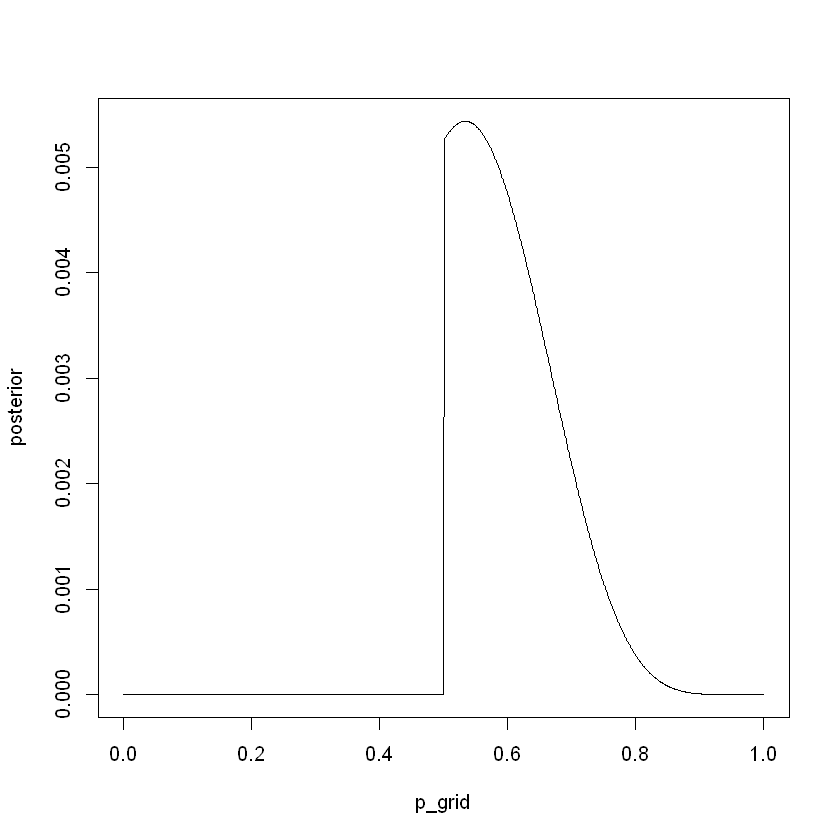

|0.9      0.9| 
0.5005005 0.7137137

[1] 0.6070759

[1] 0.5945946

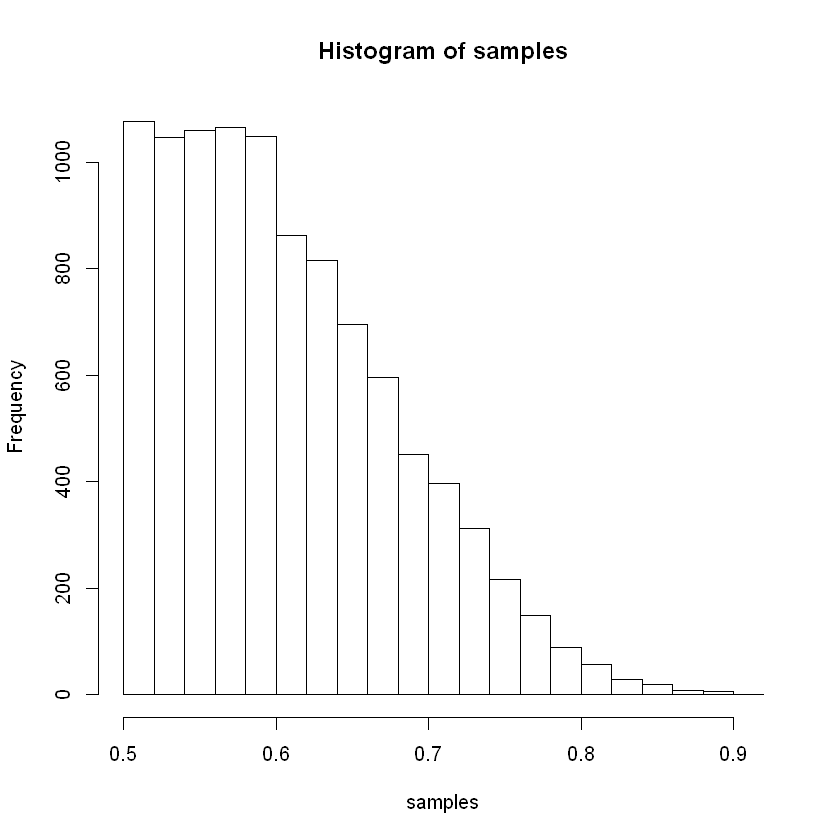

[1] 0.1576

dumdata
     1      2      3      4      5      6      7      8      9     10     11 
0.0001 0.0007 0.0032 0.0111 0.0335 0.0647 0.1139 0.1576 0.1744 0.1724 0.1317 
    12     13     14     15 
0.0781 0.0422 0.0133 0.0031 

[1] 0.2323071

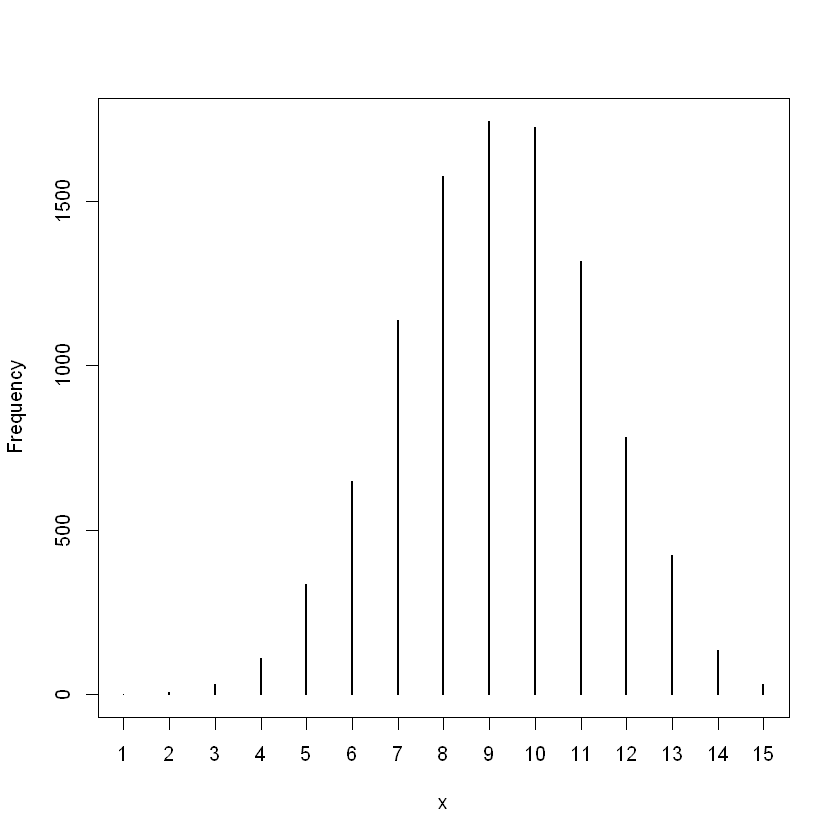

[1] 0.2319

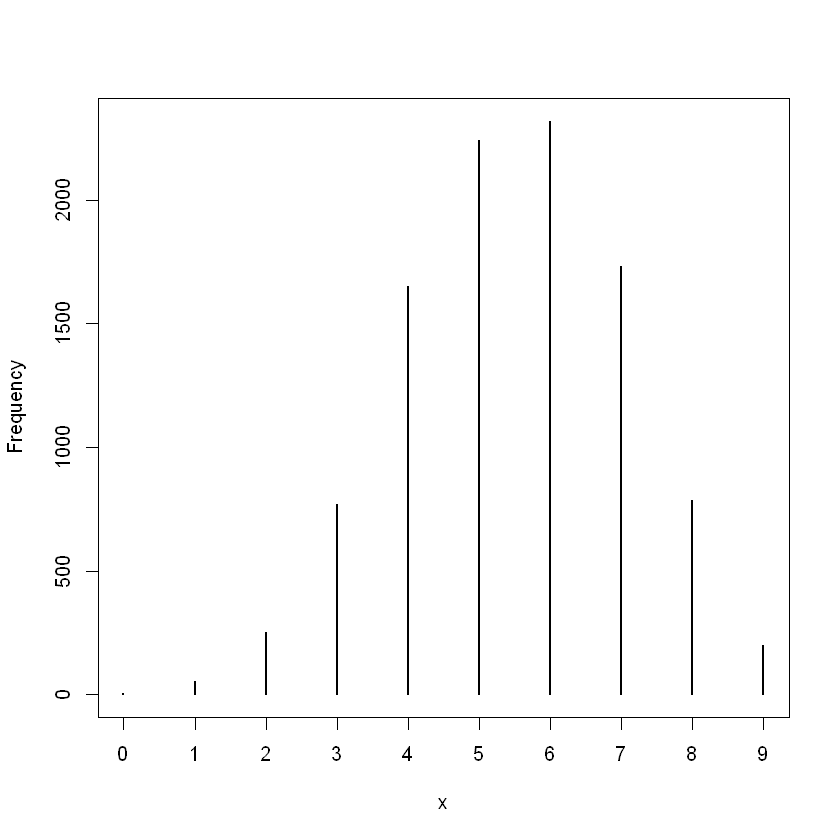

In [50]:
# alt check with generative approach
set.seed(22)
dumdata_6of9 <- rbinom(10000, size=9, prob=samples)
simplehist(dumdata_6of9)
mean(dumdata_6of9==6) #0.2319

<hr>
KONRADSENF

In [61]:

p_grid <- seq(from=0, to=1 , length.out=1000) 
prior <- ifelse(p_grid < 0.5, 0, 1)      # zero below p = 0.5 and constant above
likelihood <- dbinom(8, size=15, prob=p_grid)   
posterior <- likelihood * prior
posterior <- posterior / sum(posterior)

samples <- sample(p_grid, prob=posterior, size=1e4, replace=TRUE)
HPDI(samples, prob=0.9)


|0.9      0.9| 
0.5005005 0.7117117

The range has been narrowed down.

In [62]:
ppc <- rbinom(1e4, size=15, prob=samples)
table(ppc)/1e4

ppc
     1      2      3      4      5      6      7      8      9     10     11 
0.0001 0.0007 0.0039 0.0124 0.0313 0.0703 0.1191 0.1503 0.1799 0.1709 0.1254 
    12     13     14     15 
0.0791 0.0390 0.0150 0.0026 

8 is slightly more likely than before, yet no longer the most likely number. The prior affects the interpretation of the data. Although 70% of 15 is 10.5, so the new prior isn’t quiiite there yet.

In [63]:
ppc2 <- rbinom(1e4, size=9, prob=samples)
table(ppc2)/1e4

ppc2
     0      1      2      3      4      5      6      7      8      9 
0.0004 0.0057 0.0278 0.0812 0.1573 0.2261 0.2354 0.1684 0.0762 0.0215 

6 is now the most probable observation in 9 tosses. (70% of 9 is 6.3, so that’s fairly close.)

### Hard

In [82]:
library(rethinking)
data(homeworkch3)

In [84]:
birth1 %>% head()

[1] 1 0 0 0 1 1

**<font color = 'purple' style='background-color: lightyellow'>3H1. Using grid approximation, compute the posterior distribution for the probability of a birth
being a boy. Assume a uniform prior probability. Which parameter value maximizes the posterior
probability?</font>**

The third and final common summary task for the posterior is to produce point estimates of some kind. Given the entire posterior distribution, what value should you report? This seems like an innocent question, but it is difficult to answer. **<font color = 'green'>The Bayesian parameter estimate is precisely the entire posterior distribution, which is not a single number, but instead a function that maps each unique parameter value onto a plausibility value</font>**. So really the most important thing to note is that you don’t have to choose a point estimate. It’s hardly ever necessary. 

But if you must produce a point estimate from the posterior, you’ll have to ask and answer more questions. <font color = 'purple'>Consider the following example. Suppose again the globe tossing experiment in which we observe 3 waters out of 3 tosses, as in Figure 3.3. Let’s consider three alternative point estimates.</font> 

First, it is very common for scientists to report the parameter value with highest posterior probability, a <span style='background-color: lightgreen'>maximum a posteriori (MAP) estimate</span>. You can easily compute the MAP in this example:

**grid approx steps**

1. Define the grid. This means you decide how many points to use in estimating the
posterior, and then you make a list of the parameter values on the grid.
* Compute the value of the prior at each parameter value on the grid.
* Compute the likelihood at each parameter value.
* Compute the unstandardized posterior at each parameter value, by multiplying the
prior by the likelihood.


**dbinom parameter defn**
x, q	
vector of quantiles.

p	
vector of probabilities.

n	
number of observations. If length(n) > 1, the length is taken to be the number required.

size	
number of trials (zero or more).

**prob = p_grid => hypothesis choices**
probability of success on each trial.

log, log.p	
logical; if TRUE, probabilities p are given as log(p).

lower.tail	
logical; if TRUE (default), probabilities are 𝑃[𝑋≤𝑥], otherwise, 𝑃[𝑋>𝑥].

[1] 0.5545546

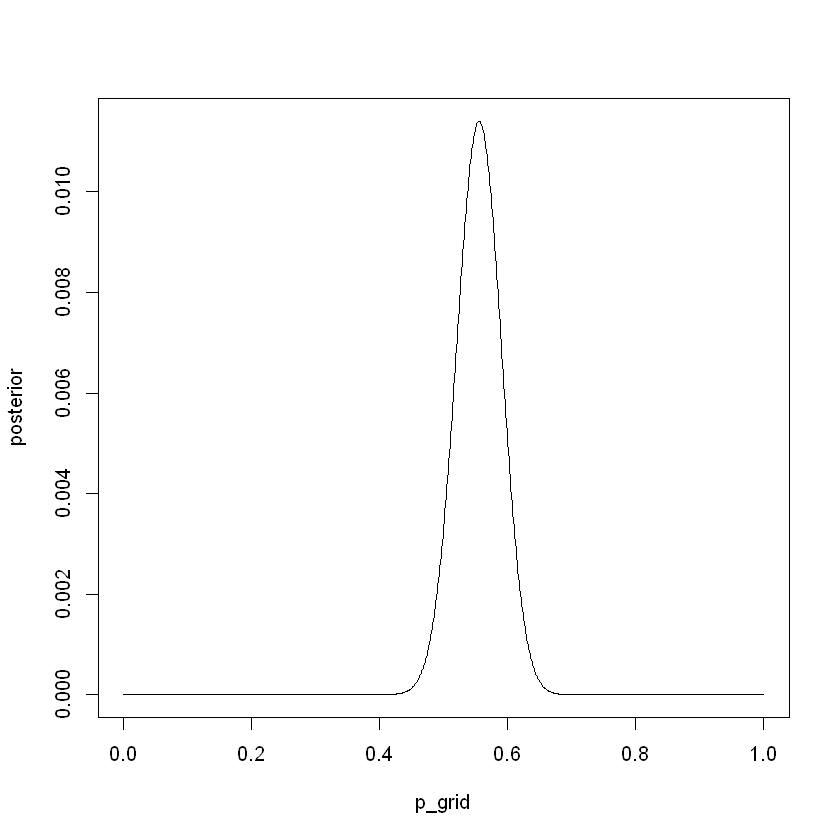

In [94]:
total.births <- length(birth1) + length(birth2)
boys.born <- sum(birth1 + birth2)
girls.born <- total.births - boys.born

p_grid <- seq(from = 0, to = 1, length.out = 1000)
prior <- rep(x = 1, length(p_grid))

likelihood <- dbinom(x = boys.born, size = total.births, prob = p_grid)

unstandardized.posterior <- likelihood * prior
posterior <- unstandardized.posterior / sum(unstandardized.posterior)
plot(posterior ~ p_grid, type = "l")

# parameter value for the probability of having a boy that's most likely, given the data
p_grid[which.max(posterior)]

In [ ]:
p_grid[which.max(posterior)]

[1] 0.5545546

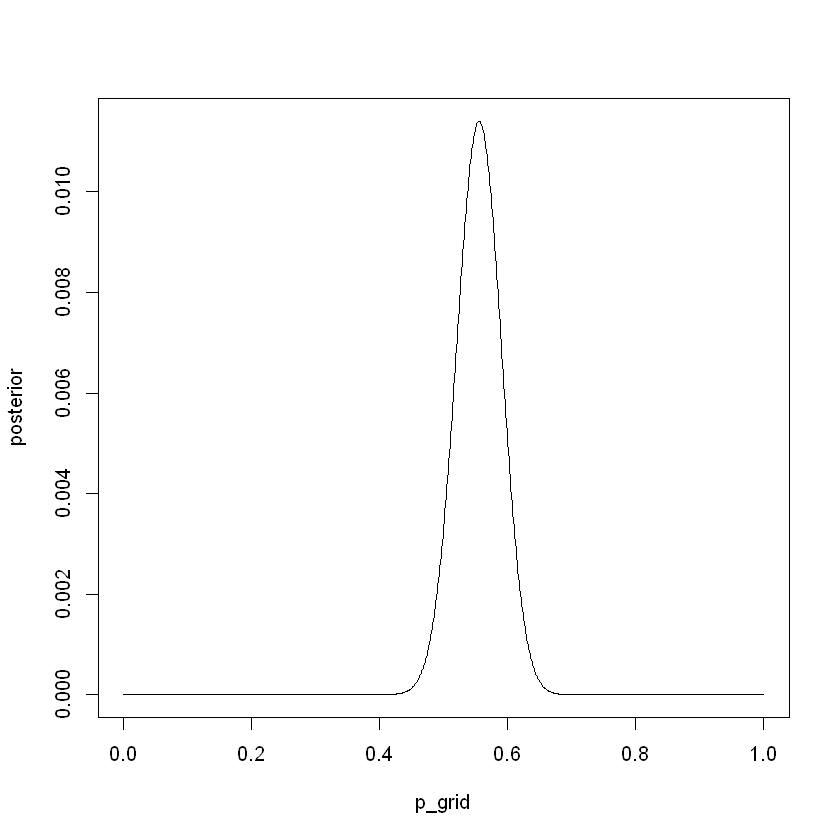

In [85]:
n_boys = sum(c(birth1, birth2))
n_ttl = length(birth1) + length(birth2)
n_pgrid = 1000
p_grid = seq(0, 1, length.out = n_pgrid)
prior = rep(1, n_pgrid)
likelihood = dbinom(n_boys, size=n_ttl, prob = p_grid)
posterior = likelihood * prior
posterior = posterior / sum(posterior)
plot(p_grid, posterior, type='l')
p_grid[which.max(posterior)] #0.5545546

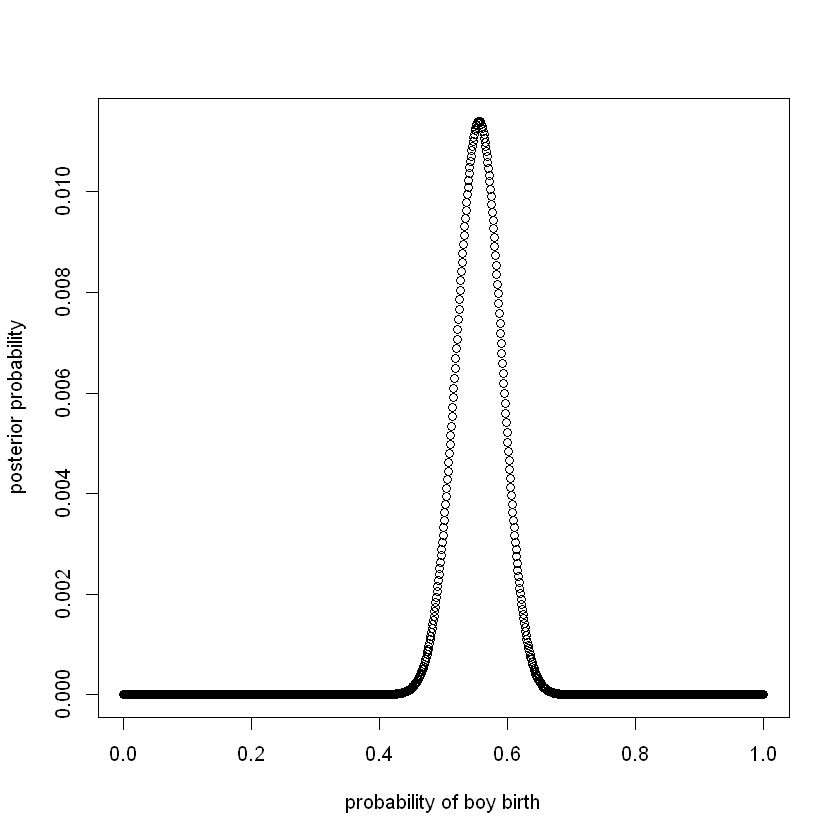

In [86]:
birthboys <- sum(birth1, birth2)
p_grid <- seq(from=0, to=1, length.out=1000) 
prior <- rep( 1, 200) 

likelihood <- dbinom(birthboys, size=200, prob=p_grid) 
unstd.posterior <- likelihood * prior 
posterior <- unstd.posterior / sum(unstd.posterior) 

plot(p_grid, posterior, type="b",
     xlab="probability of boy birth", ylab="posterior probability")


**<font color = 'purple' style='background-color: lightyellow'>3H2. Using the sample function, draw 10,000 random parameter values from the posterior distribution you calculated above. Use these samples to estimate the 50%, 89%, and 97% highest posterior
density intervals.</font>**

In [95]:
trials <- 1e4
samples <- sample(x = p_grid, size = trials, prob = posterior, replace = TRUE)
HPDI(samples = samples, prob = c(.5, .89, .97))


|0.97     |0.89      |0.5      0.5|     0.89|     0.97| 
0.4824825 0.5005005 0.5305305 0.5765766 0.6126126 0.6316316

In [96]:
# 3H2
n_ptrials = 1e4
p_samples = sample(p_grid,size = n_ptrials, prob = posterior, replace = TRUE)
(hpi_50 = HPDI(samples, .5))
(hpi_89 = HPDI(samples, .89))
(hpi_97 = HPDI(samples, .97))
for(w in c(.5, .89, .97)){
  hpi = HPDI(samples, w)
  print(sprintf("HPDI %d%% [%f, %f]",w*100, hpi[1], hpi[2]))
}
mean(p_samples)
median(p_samples)

|0.5      0.5| 
0.5305305 0.5765766

|0.89     0.89| 
0.5005005 0.6126126

|0.97     0.97| 
0.4824825 0.6316316

[1] "HPDI 50% [0.530531, 0.576577]"
[1] "HPDI 89% [0.500501, 0.612613]"
[1] "HPDI 97% [0.482482, 0.631632]"


[1] 0.5546548

[1] 0.5555556

<font color = 'purple' style='background-color: lightyellow'>3H3. Use rbinom to simulate 10,000 replicates of 200 births. 
* You should end up with 10,000 numbers, each one a count of boys out of 200 births. 
    
* Compare the distribution of predicted numbers of boys to the actual count in the data (111 boys out of 200 births). 

* There are many good ways to visualize the simulations, but the dens command (part of the rethinking package) is probably the easiest way in this case. 

Does it look like the model fits the data well? That is, does the distribution of predictions include the actual observation as a central, likely outcome?</font>

<img src='pics/SR_a13.png' alt='Drawing' style='width: 450pt'/>

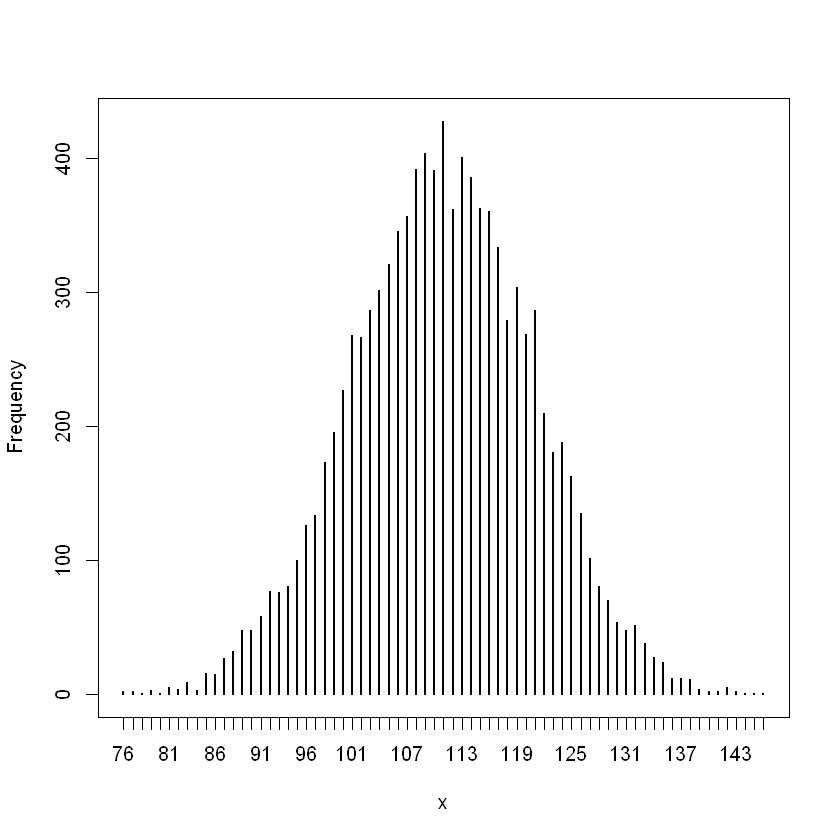

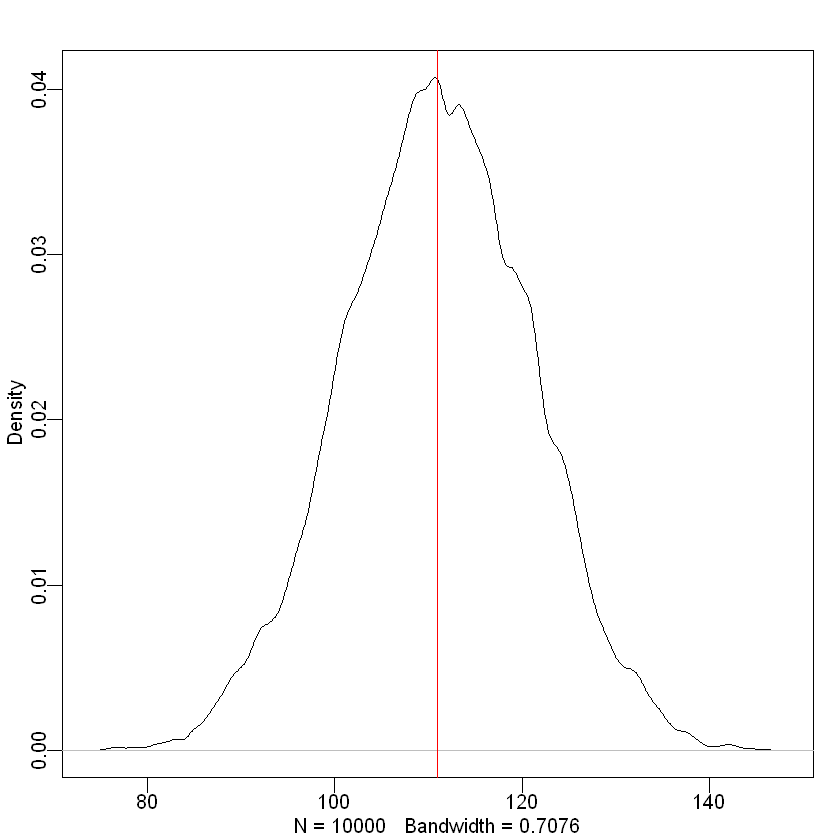

In [124]:
trials <- 1e4
total.births <- length(birth1) + length(birth2) # total births = 200
p_grid <- seq(from = 0, to = 1, length.out = 1000)


# posterior
likelihood <- dbinom(x = boys.born, size = total.births, prob = p_grid)
prior <- rep(x = 1, length(p_grid))
unstandardized.posterior <- likelihood * prior
posterior <- unstandardized.posterior / sum(unstandardized.posterior)


samples <- sample(x = p_grid, size = trials, prob = posterior, replace = TRUE)


predicted.posterior.distribution <- rbinom(n = trials, size = total.births, prob = samples)
simplehist(predicted.posterior.distribution)
dens(predicted.posterior.distribution)
abline(v =  sum(birth1 + birth2), col = "red")

**<font color = 'purple' style='background-color: lightyellow'>3H4. Now compare 10,000 counts of boys from 100 simulated first borns only to the number of boys
in the first births, birth1. How does the model look in this light?</font>**

[1] 51

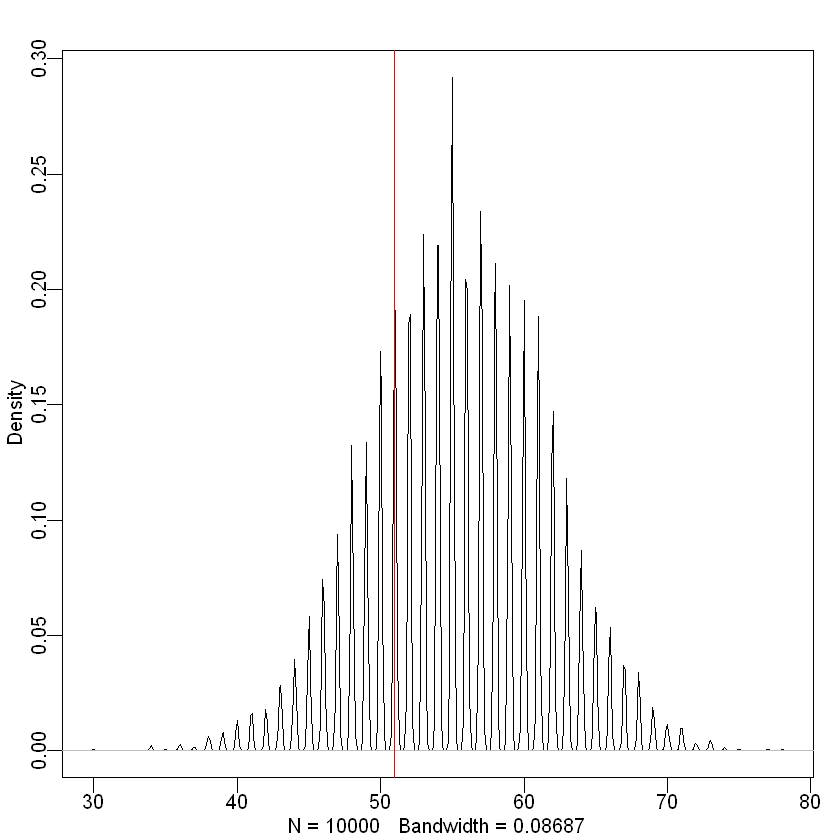

In [114]:
n <- 100
trials <- 1e4

samples <- sample(x = p_grid, size = trials, prob = posterior, replace = TRUE)

sum(birth1)
posterior.predictive.distribution <- rbinom(n = trials, size = n, prob = samples)
dens(posterior.predictive.distribution, adj = .1)
abline(v = sum(birth1), col = "red" )

[1] 55.2856

[1] 55

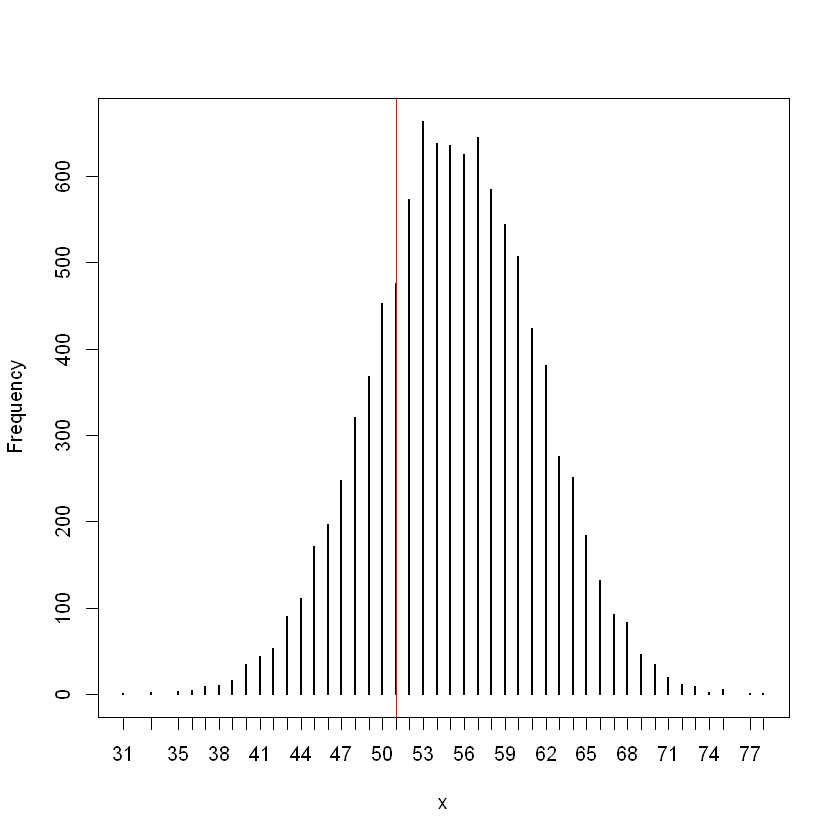

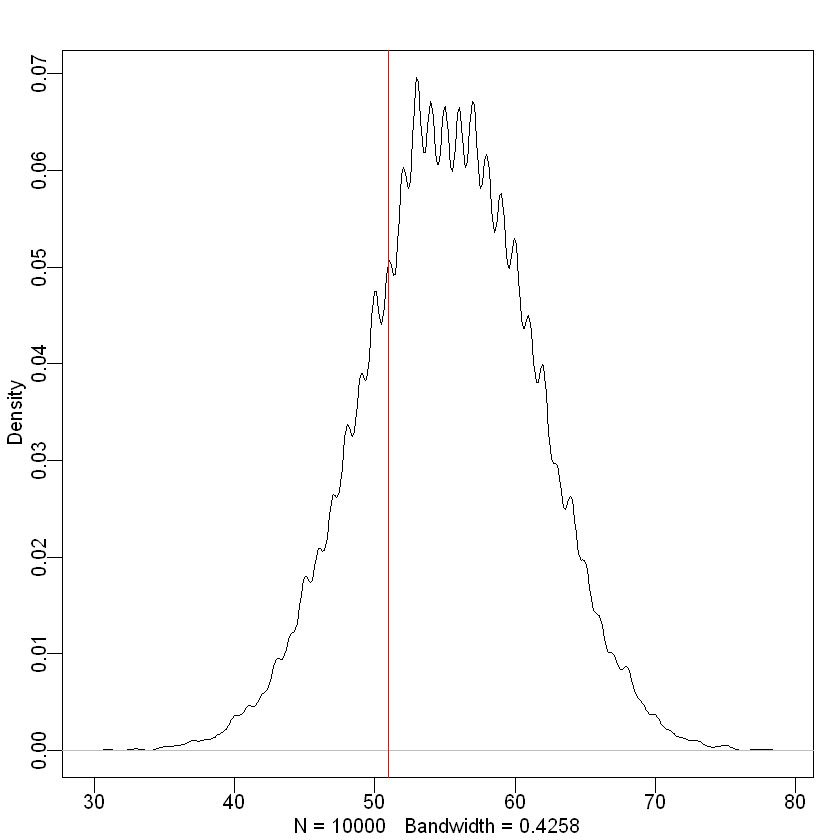

In [115]:
n_boys_b1 = sum(birth1)   # = 51
n_ttl_b1 = length(birth1) # = 100
n_btrials = 1e4 #birth observations

p_samples = sample(p_grid,size = n_btrials, prob = posterior, replace = TRUE)

b_sample = rbinom(n_btrials, size=n_ttl_b1, prob=p_samples)

simplehist(b_sample)
abline(v = n_boys_b1, col = "red")

mean(b_sample) #55.39
median(b_sample) #55

dens(b_sample)
abline(v = n_boys_b1, col = "red")
# model overestimates number of boys for the first child

**<font color = 'purple' style='background-color: lightyellow'>3H5. The model assumes that sex of first and second births are independent. To check this assump-
tion, focus now on second births that followed female first borns. Compare 10,000 simulated counts
of boys to only those second births that followed girls. To do this correctly, you need to count the
number of first borns who were girls and simulate that many births, 10,000 times. Compare the
counts of boys in your simulations to the actual observed count of boys following girls. How does the
model look in this light? Any guesses what is going on in these data?</font>**

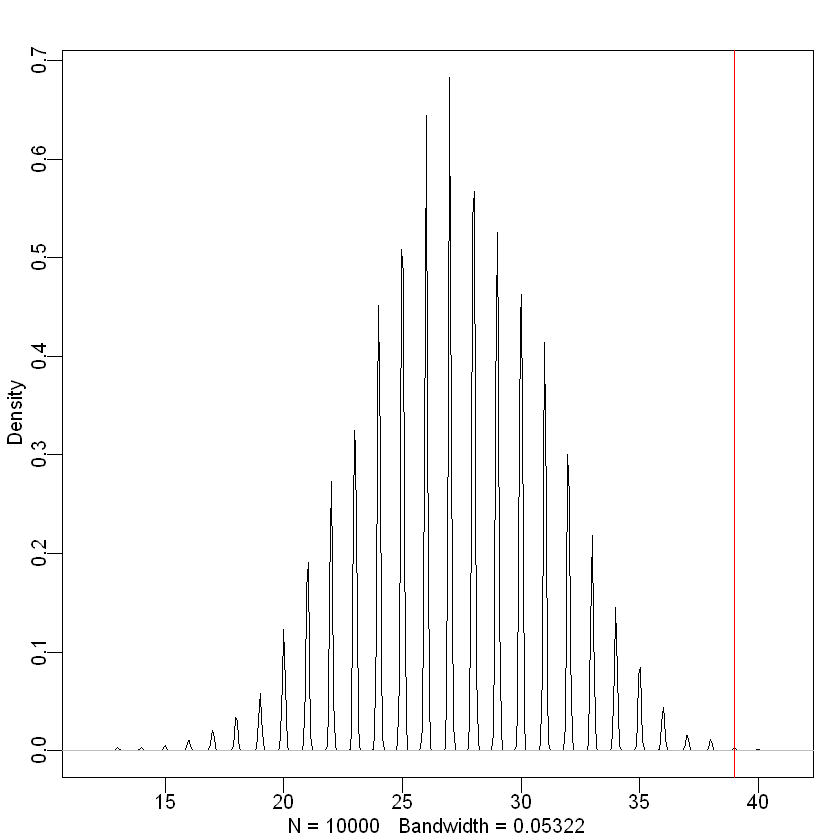

In [117]:
## 3H5
boys.born.after.girls <- birth2[birth1 == 0]
posterior.predictive.distribution <- rbinom(n = trials, size = length(boys.born.after.girls), prob = samples)
dens(posterior.predictive.distribution, adj = .1)
abline(v = sum(boys.born.after.girls), col = "red")


[1] "there were 39 boys born after first girl. There were ttl 49 cases"


[1] 27.1404

[1] 27

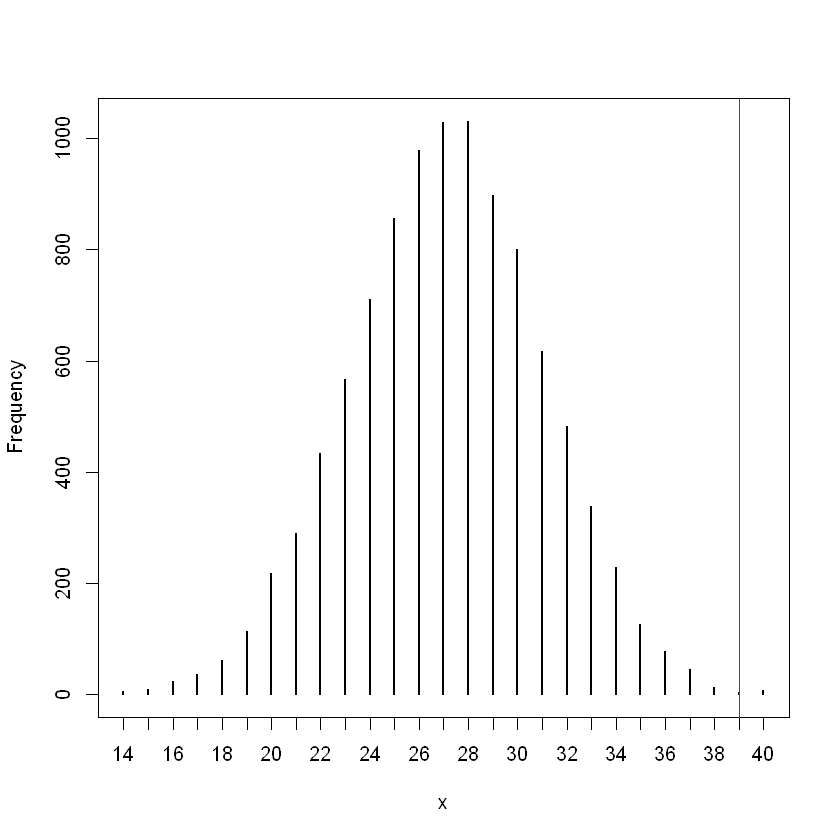

In [125]:
# 3H5
n_ttl_g1 = sum(birth1==0)
n_ttl_g1b2 = sum(birth2[birth1==0])
print(sprintf("there were %d boys born after first girl. There were ttl %d cases",n_ttl_g1b2,n_ttl_g1))

n_btrials = 1e4 #birth observations
b_sample = rbinom(n_btrials, size=n_ttl_g1, prob=p_samples)
mean(b_sample) #27
median(b_sample) #27
#dens(b_sample)
simplehist(b_sample)
abline(v = n_ttl_g1b2, col = "red")
# model underestimates number of boys for the second child after the first girl

# conclusion - gender of the second child is not independent from the first one

# Week 1 Homework

##### (1) 

Suppose the globe tossing data had turned out to be 8 water in 15 tosses. <b><font color = 'purple'>Construct the posterior distribution </font></b>, using grid approximation. Use the same flat prior as before.

[1] 1

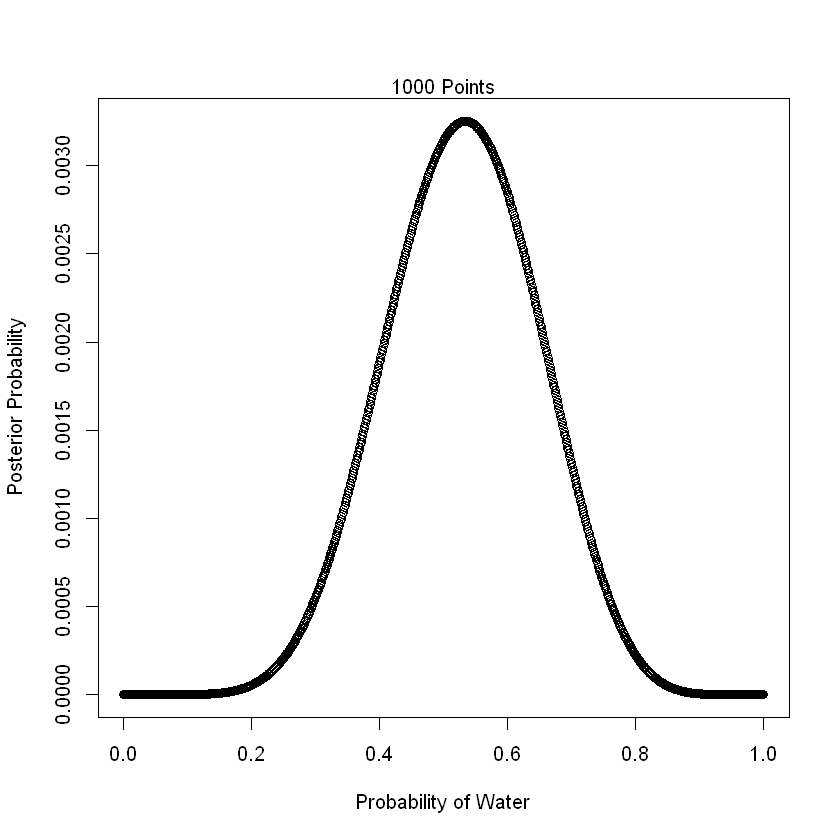

In [126]:
p_grid <- seq( from=0 , to=1 , length.out=1000 )
prior <- rep( 1 , 1000 )
likelihood <- dbinom( 8 , size=15 , prob=p_grid )
posterior_counts <- likelihood * prior
posterior_prob_distribution <- posterior_counts / sum(posterior_counts)
posterior <- posterior_prob_distribution
sum(posterior)

plot_distribution <- function(x,y){
    plot(x=x,y=y,type='b',
        xlab="Probability of Water",
        ylab="Posterior Probability")
    title <- paste(length(x),"Points") 
    # paste <- Concatenate vectors after converting to character.
    mtext(title)
}
plot_distribution(p_grid, posterior)

In [127]:
set.seed(100)
samples <- sample( p_grid , prob=posterior , size=1e4 , replace=TRUE )
samples %>% mean()
samples %>% PI(prob=.99)


[1] 0.528984

1%      100% 
0.2432432 0.8078128

##### (2) 

Start over in 1, but now use a prior that is zero below p =0.5 and a constant above p =0.5. This corresponds to prior information that a majority of the Earth’s surface is water. What difference does the better prior make? If it helps, compare posterior distributions (using both priors) to the true value p =0.7.

[1] 1

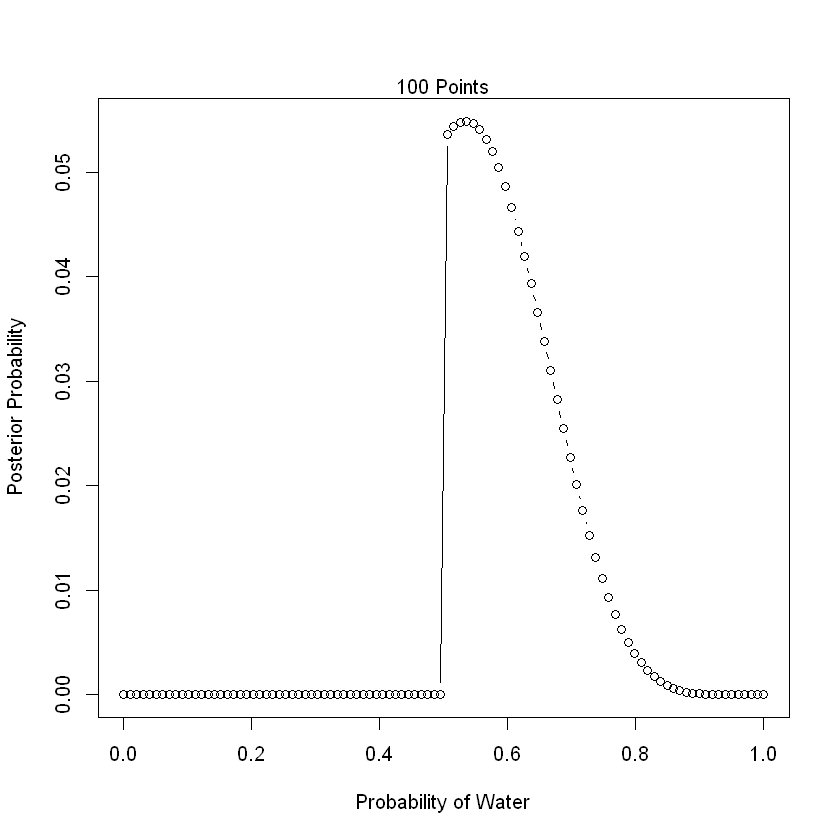

In [128]:
p_grid <- seq( from=0 , to=1 , length.out=100 )
prior <- ifelse( p_grid < 0.5 , 0 , 1 )
likelihood <- dbinom( 8 , size=15 , prob=p_grid )
posterior_counts <- likelihood * prior
posterior_prob_distribution <- posterior_counts / sum(posterior_counts)
posterior <- posterior_prob_distribution
sum(posterior)

plot_distribution <- function(x,y){
    plot(x=x,y=y,type='b',
        xlab="Probability of Water",
        ylab="Posterior Probability")
    title <- paste(length(x),"Points") 
    # paste <- Concatenate vectors after converting to character.
    mtext(title)
}
plot_distribution(p_grid, posterior)

In [129]:
samples2 <- sample( p_grid , prob=posterior , size=1e4 , replace=TRUE )
samples2 %>% mean()
samples2 %>% PI(prob=.99)

[1] 0.605903

1%      100% 
0.5050505 0.8282828

This prior yields a posterior with more mass around the true value of 0.7.
This is probably easier to see in a plot:

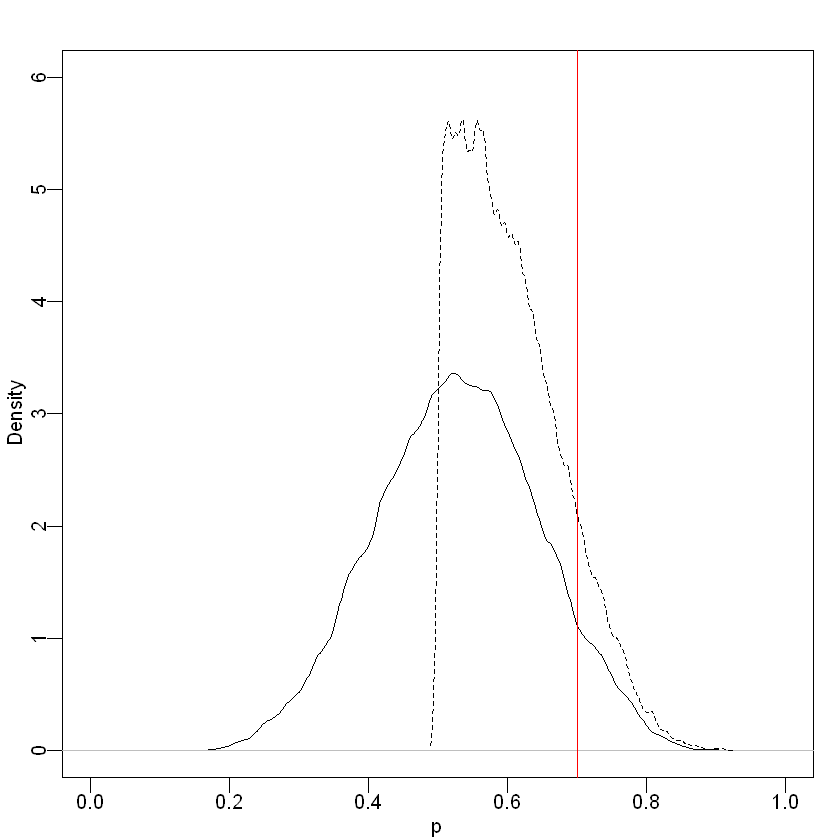

In [130]:
dens( samples , xlab="p" , xlim=c(0,1) , ylim=c(0,6) )
dens( samples2 , add=TRUE , lty=2 )
abline( v=0.7 , col="red" )

With the impossible values less than 0.5 ruled out, the second model piles up more plausibility on the higher values near the true value. The data are still misleading it to think that values just above 0.5 are the most plausible. But the posterior mean of 0.63 is much better than 0.53 from the previous problem. Informative priors, when based on real scientific information, help. Here, the informative prior helps because there isn’t much data. That is common in a lot of fields, ranging from astronomy to paleontology.

##### (3)

This problem is more open-ended than the others. Feel free to collaborate on the solution. Suppose you want to estimate the Earth’s proportion of water very precisely. 

<font color = 'purple'>Specifically, you want the 99% percentile interval of the posterior distribution of to be only 0.05 wide. This means the distance between the upper and lower bound of the interval should be 0.05. How many times will you have to toss the globe to do this? </font> I won’t require a precise answer. I’m honestly more interested in your approach.

One way to approach this problem is to try a range of sample sizes and to plot the interval width of each. Here’s some code to compute the posterior and get the interval width:

In [141]:
set.seed(100)
N <- 20
p_true <- 0.7
W <- rbinom( 1 , size=N , prob=p_true )
p_grid <- seq( from=0 , to=1 , length.out=1000 )
prior <- rep( 1 , 1000 )
prob_data <- dbinom( W , size=N , prob=p_grid )
posterior <- prob_data * prior
posterior <- posterior / sum(posterior)
samples <- sample( p_grid , prob=posterior , size=1e4 , replace=TRUE )
PI99 <- PI( samples , 0.99 )
as.numeric( PI99[2] - PI99[1] )

[1] 0.4544595

There are other ways to compute the interval width. But the above is closest to the code in the book. Now since we want to do this for different values of N, it’s nice to make this into a function:

In [137]:
f <- function( N ) {
    p_true <- 0.7
    W <- rbinom( 1 , size=N , prob=p_true )
    p_grid <- seq( from=0 , to=1 , length.out=1000 )
    prior <- rep( 1 , 1000 )
    prob_data <- dbinom( W , size=N , prob=p_grid )
    posterior <- prob_data * prior
    posterior <- posterior / sum(posterior)
    samples <- sample( p_grid , prob=posterior , size=1e4 , replace=TRUE )
    PI99 <- PI( samples , 0.99 )
    as.numeric( PI99[2] - PI99[1] )
}

Now if you enter f(20), you get an interval width for 20 globe tosses. Now notice that the interval width varies across simulations. Try f(20) a few times to see what I mean. But as you increase N, this variation shrinks rapidly. This is because as the sample size increases, the differences between samples shrink. So if you ignore the sample to sample variation in interval width, that’s okay in this example. But in the code below, I’ll account for it. 

Now we need to run simulations across a bunch of different sample size to find where the interval shrinks to 0.05 in width. I’ll use sapply to run 100 simulations at each of 7 sample sizes:

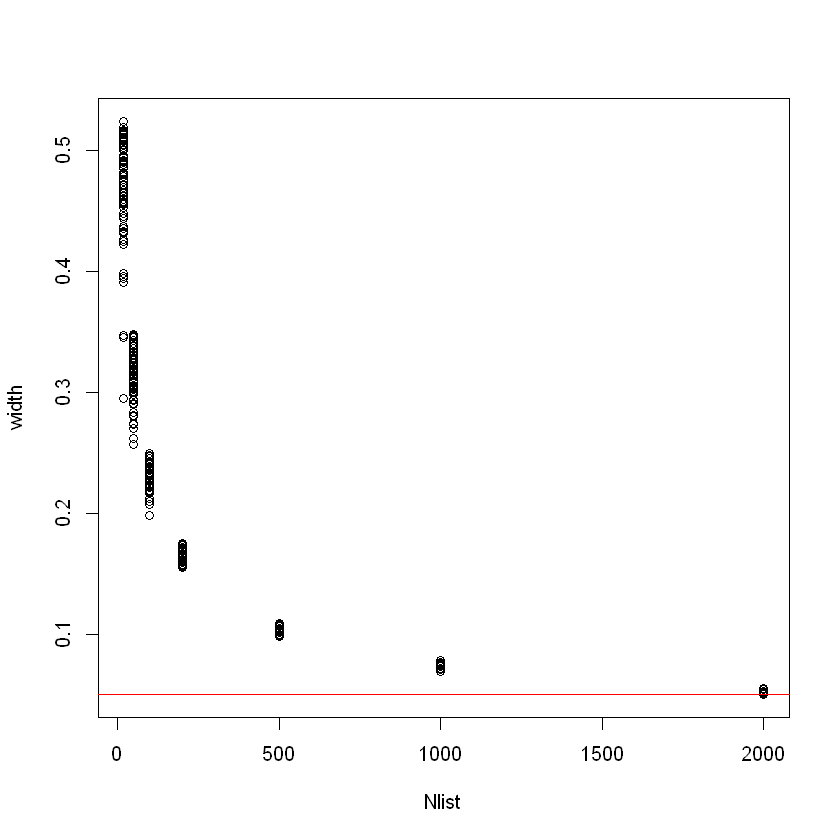

In [139]:
Nlist <- c( 20 , 50 , 100 , 200 , 500 , 1000 , 2000 )
Nlist <- rep( Nlist , each=100 )
width <- sapply( Nlist , f )
plot( Nlist , width )
abline( h=0.05 , col="red" )

What are we looking at in this plot? The horizontal is sample size. The points are individual interval widths, one for each simulation. The red line is drawn at a width of 0.05. Looks like we need more than 2000 tosses of the globe to get the interval to be that precise. The above is a general feature of learning from data: The greatest returns on learning come early on. Each additional observation contributes less and less. So it takes very much effort to progressively reduce our uncertainty. So if your application requires a very precise estimate, be prepared to collect a lot of data. Or to change your approach.